In [1]:
import torch
import gpytorch
import numpy as np
import pandas as pd
import scipy.optimize as optimize


from bo_functions import ExactGPModel
from bo_functions import bo_iter
from bo_functions import calc_y_exp
from bo_functions import create_y_data
from bo_plotters import plot_xy
from bo_plotters import y_plotter
from bo_plotters import stdev_plotter
from bo_plotters import ei_plotter

In [2]:
#Set Parameters
Theta_True = np.array([1,-1])
noise_std = 0.1**2
q = 2
verbose = True
BO_iters = 3
iterations = 300
explore_bias = [0,0.1,0.5]

#Pull Experimental data from CSV
exp_data_doc = "exp_data.csv"
exp_data = np.array(pd.read_csv(exp_data_doc, header=0,sep=","))
Xexp = exp_data[:,1]
Yexp = exp_data[:,2]
n = len(Xexp)

#Define GP Testing space
p=20
Theta1 =  np.linspace(0.5,1.5,p) #1x10
Theta2 =  np.linspace(-1.5,-0.5,p) #1x10
# Theta1 =  np.linspace(-2,2,p) #1x10
# Theta2 =  np.linspace(-2,2,p) #1x10
theta_mesh = np.array(np.meshgrid(Theta1, Theta2)) #2 Uniform 5x5 arrays
theta1_mesh = theta_mesh[0]
theta2_mesh = theta_mesh[1]




In [3]:
#Reduce Number of Training Points


/afs/crc.nd.edu/user/m/mcarlozo/.conda/envs/Toy_Problem_env/lib/python3.9/site-packages/gpytorch/lazy/lazy_tensor.py:1741: UserWarning: torch.triangular_solve is deprecated in favor of torch.linalg.solve_triangularand will be removed in a future PyTorch release.
torch.linalg.solve_triangular has its arguments reversed and does not return a copy of one of the inputs.
X = torch.triangular_solve(B, A).solution
should be replaced with
X = torch.linalg.solve_triangular(A, B). (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:1672.)
  Linv = torch.triangular_solve(Eye, L, upper=False).solution


BO Iteration =  1
Exploration Bias =  0
Scipy Theta Best =  [ 1.1662464 -1.5      ]
Argmax Theta Best =  [ 1.18421053 -1.5       ]
Scipy Theta Opt =  [ 1.16624642 -1.5       ]
Argmin Theta_Opt_GP =  [ 1.18421053 -1.5       ] 



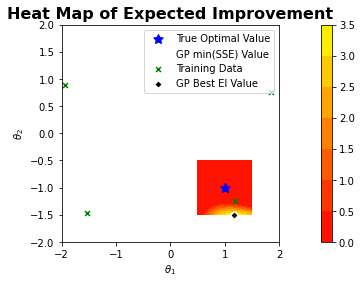

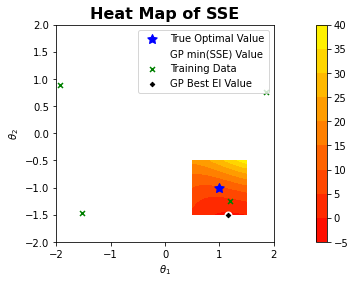

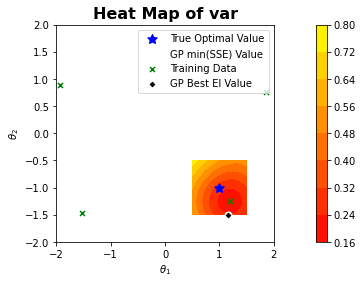

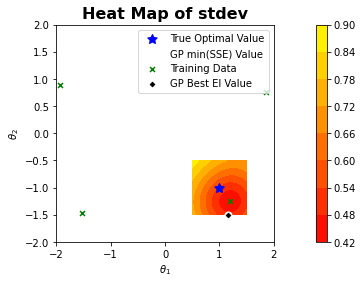

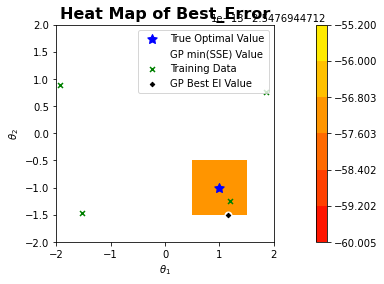

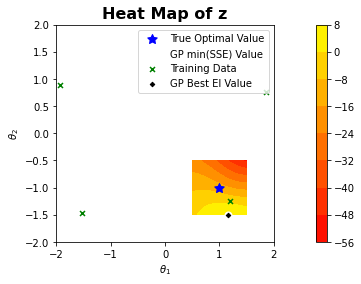

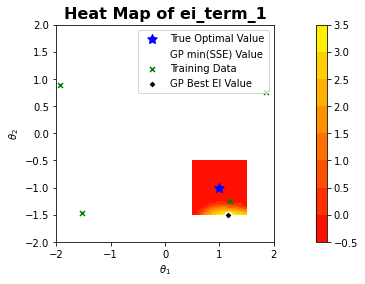

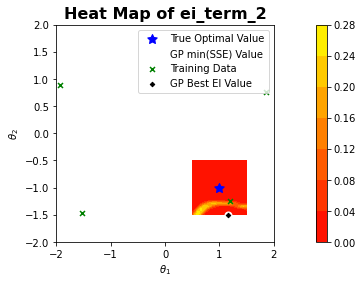

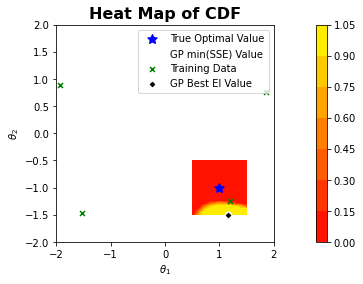

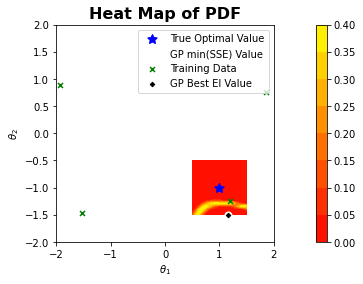

BO Iteration =  2
Exploration Bias =  0
Scipy Theta Best =  [ 1.1662464 -1.5      ]
Argmax Theta Best =  [ 1.18421053 -1.5       ]
Scipy Theta Opt =  [ 1.16624642 -1.5       ]
Argmin Theta_Opt_GP =  [ 1.18421053 -1.5       ] 



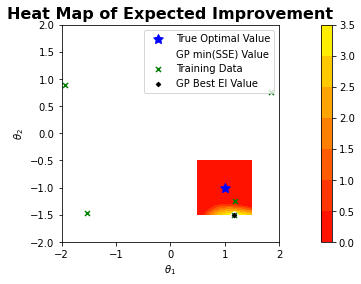

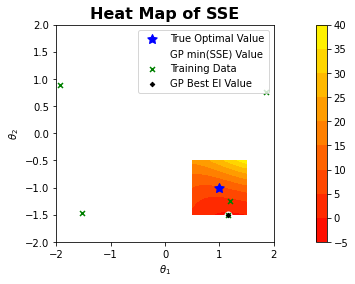

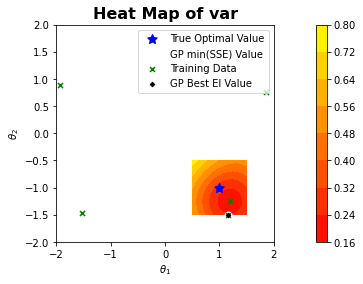

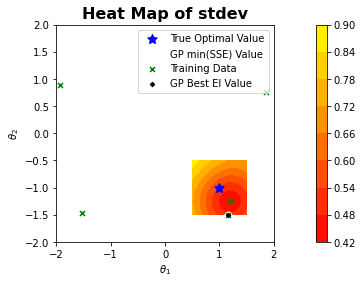

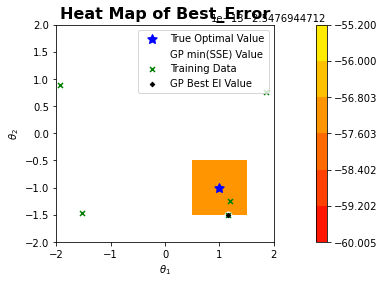

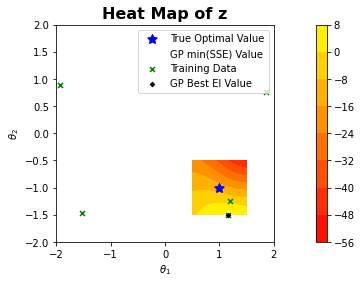

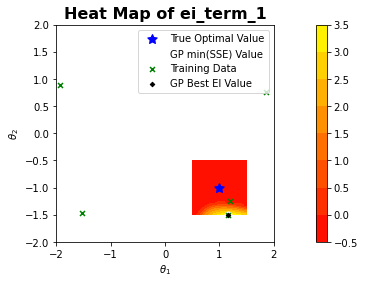

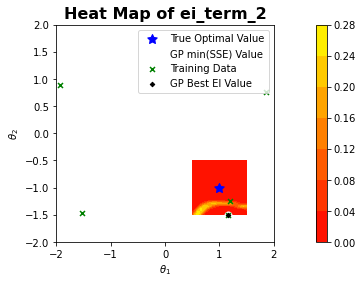

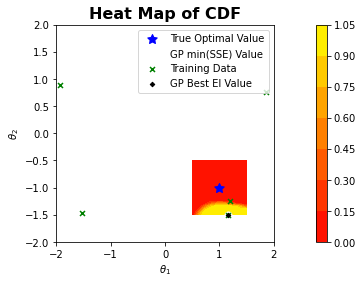

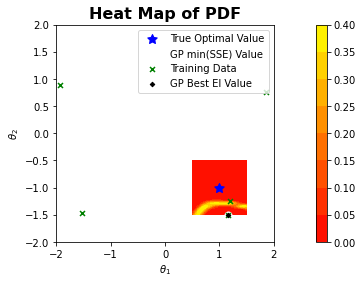

BO Iteration =  3
Exploration Bias =  0
Scipy Theta Best =  [ 1.1662464 -1.5      ]
Argmax Theta Best =  [ 1.18421053 -1.5       ]
Scipy Theta Opt =  [ 1.16624642 -1.5       ]
Argmin Theta_Opt_GP =  [ 1.18421053 -1.5       ] 



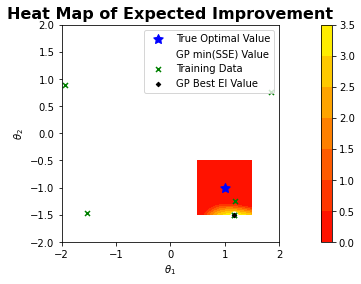

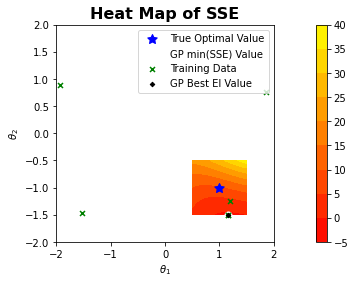

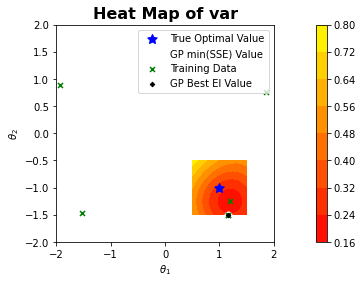

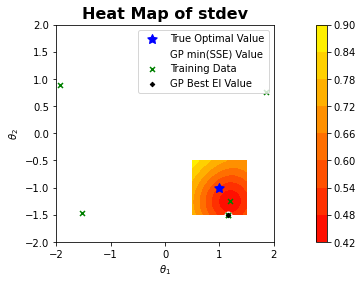

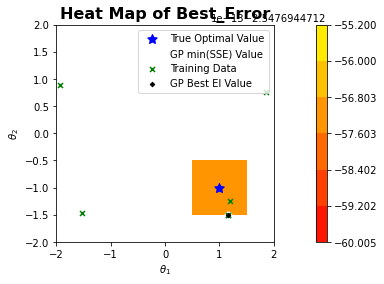

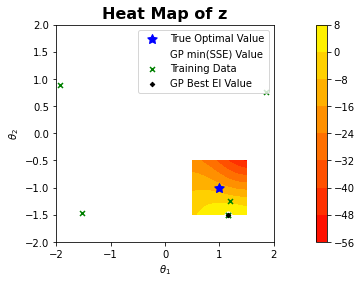

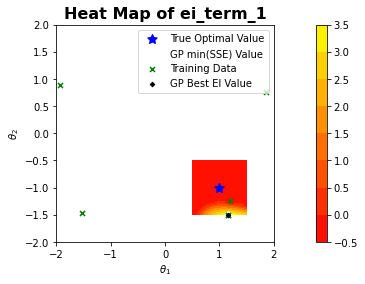

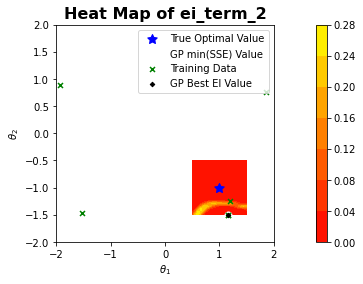

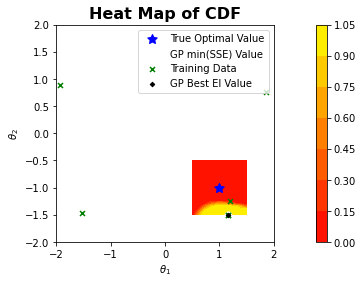

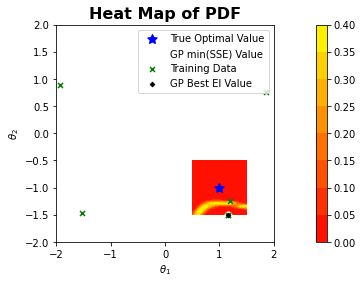

(array([ 1.1662464, -1.5      ]), array([ 1.16624642, -1.5       ]))


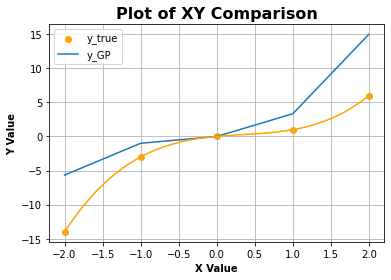

Magnitude of SSE given Theta_Opt =  [ 1.16624642 -1.5       ] is 160.339
BO Iteration =  1
Exploration Bias =  0.1
Scipy Theta Best =  [ 1.1662464 -1.5      ]
Argmax Theta Best =  [ 1.18421053 -1.5       ]
Scipy Theta Opt =  [ 1.16624642 -1.5       ]
Argmin Theta_Opt_GP =  [ 1.18421053 -1.5       ] 



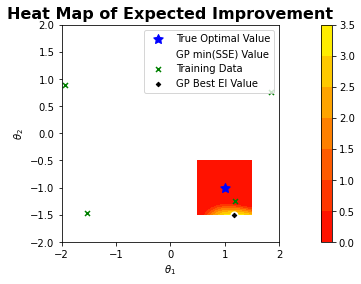

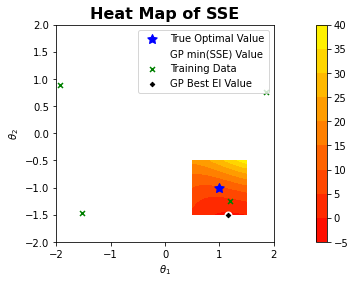

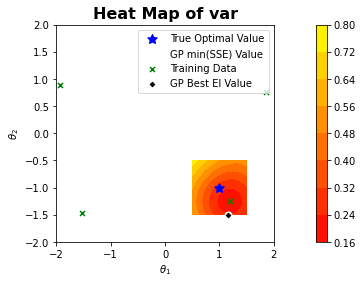

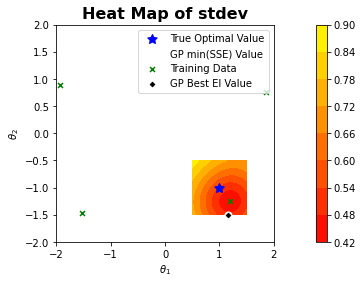

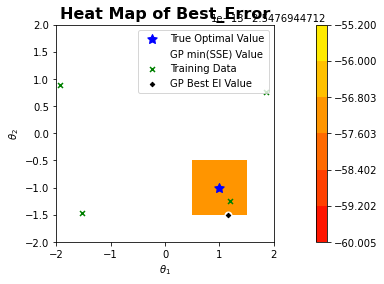

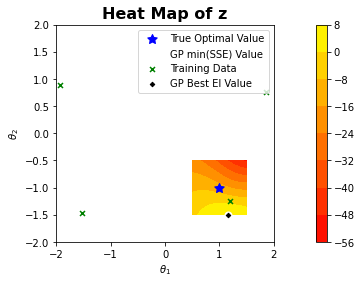

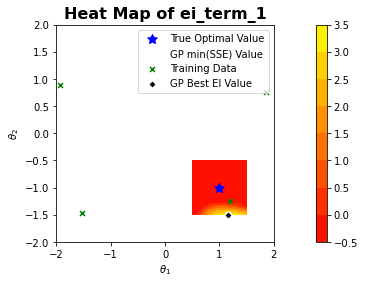

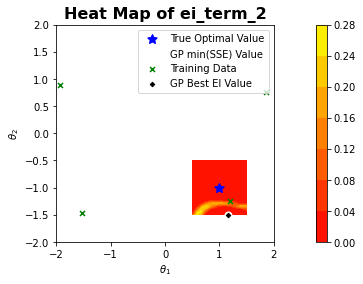

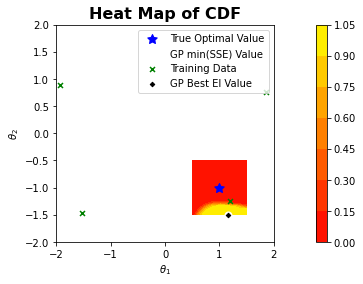

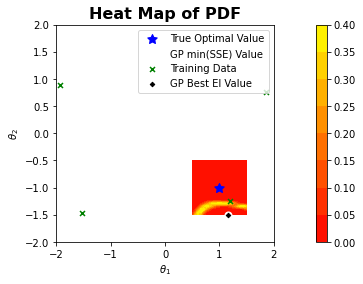

BO Iteration =  2
Exploration Bias =  0.1
Scipy Theta Best =  [ 1.1662464 -1.5      ]
Argmax Theta Best =  [ 1.18421053 -1.5       ]
Scipy Theta Opt =  [ 1.16624642 -1.5       ]
Argmin Theta_Opt_GP =  [ 1.18421053 -1.5       ] 



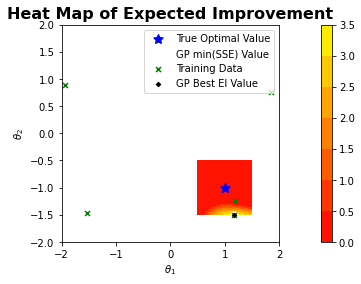

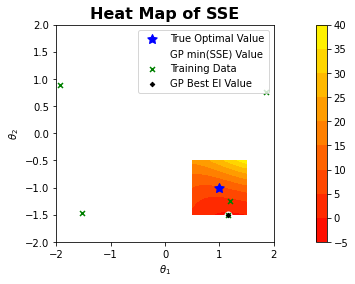

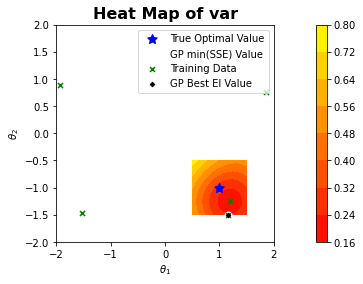

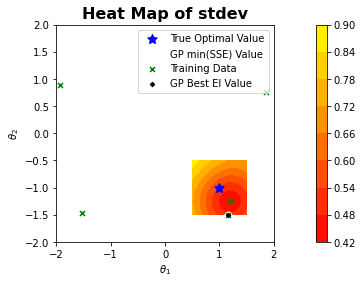

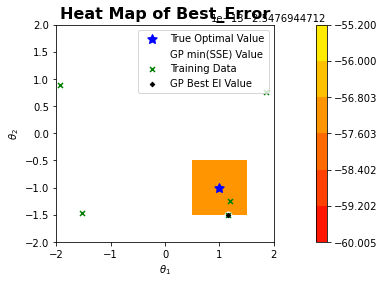

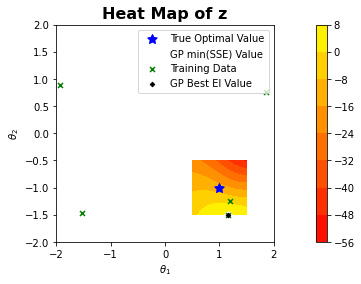

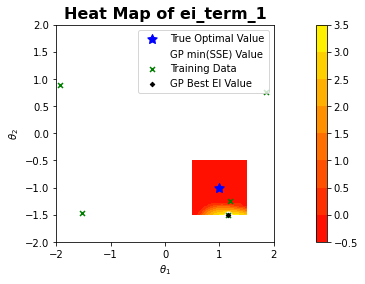

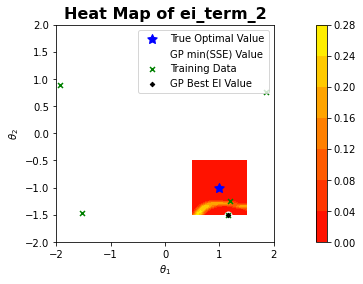

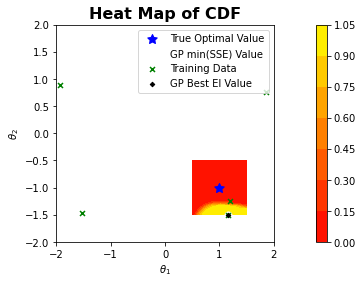

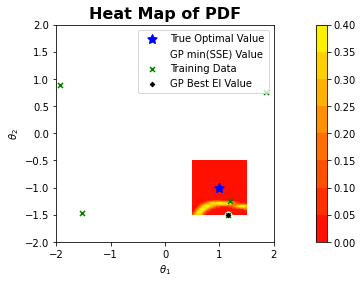

BO Iteration =  3
Exploration Bias =  0.1
Scipy Theta Best =  [ 1.1662464 -1.5      ]
Argmax Theta Best =  [ 1.18421053 -1.5       ]
Scipy Theta Opt =  [ 1.16624642 -1.5       ]
Argmin Theta_Opt_GP =  [ 1.18421053 -1.5       ] 



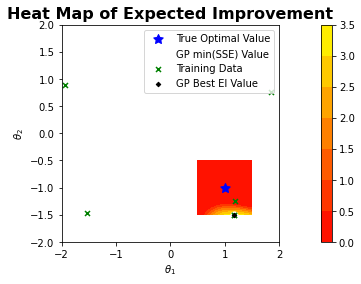

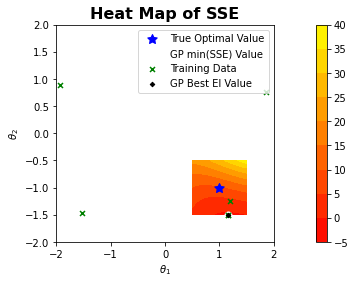

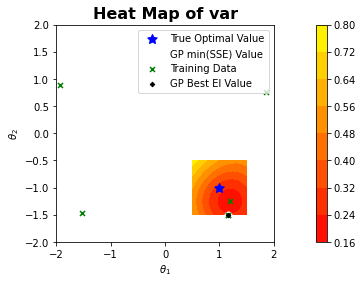

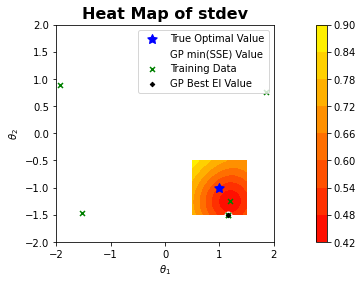

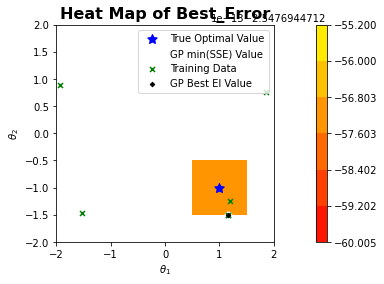

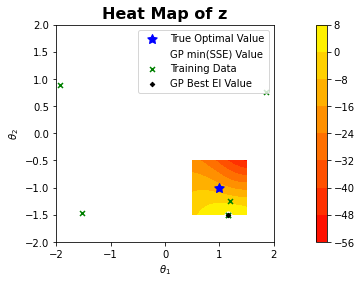

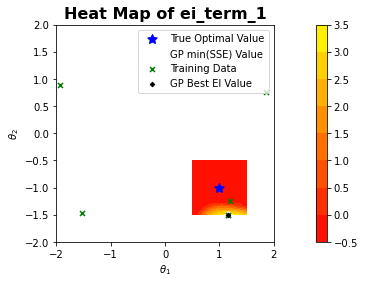

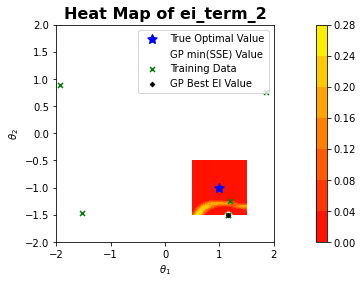

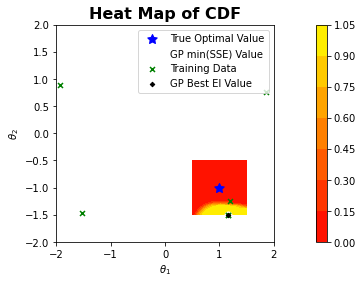

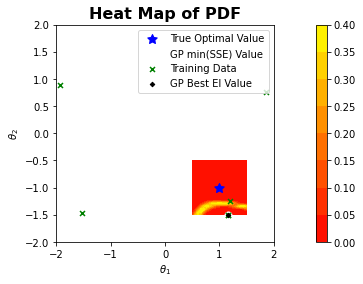

(array([ 1.1662464, -1.5      ]), array([ 1.16624642, -1.5       ]))


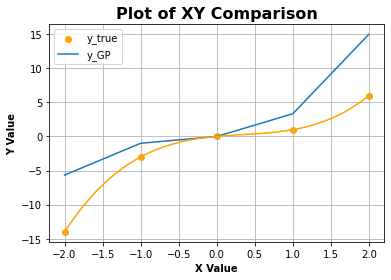

Magnitude of SSE given Theta_Opt =  [ 1.16624642 -1.5       ] is 160.339
BO Iteration =  1
Exploration Bias =  0.5
Scipy Theta Best =  [ 1.1662464 -1.5      ]
Argmax Theta Best =  [ 1.18421053 -1.5       ]
Scipy Theta Opt =  [ 1.16624642 -1.5       ]
Argmin Theta_Opt_GP =  [ 1.18421053 -1.5       ] 



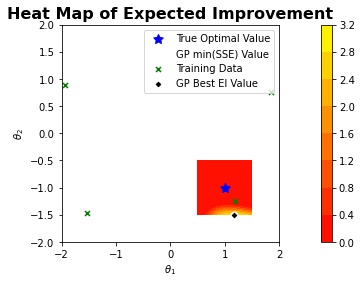

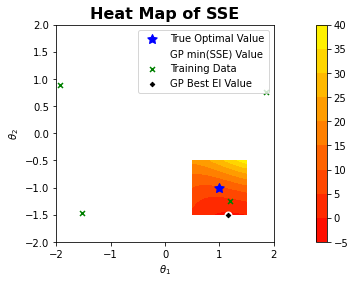

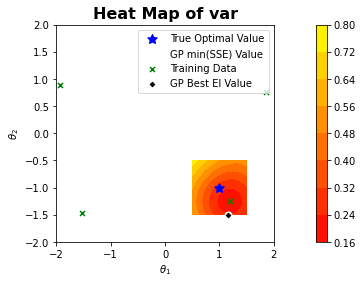

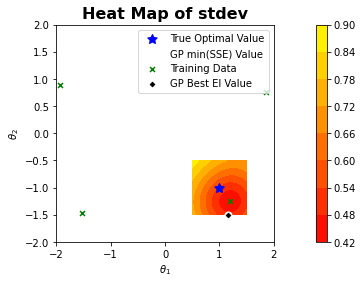

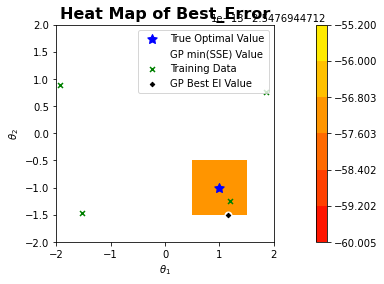

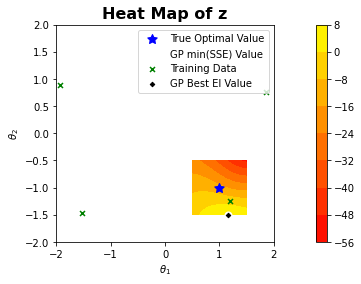

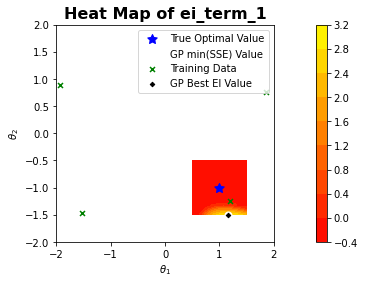

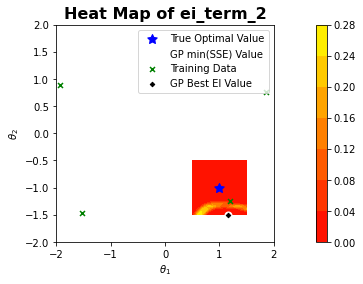

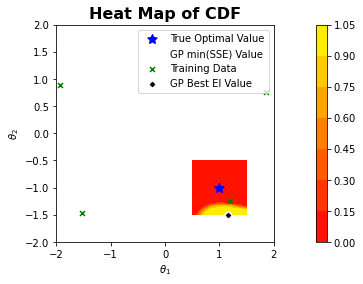

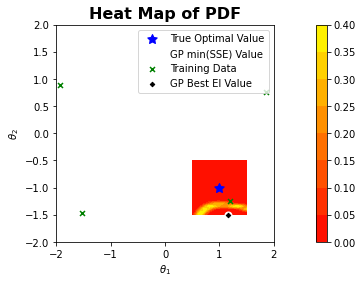

BO Iteration =  2
Exploration Bias =  0.5
Scipy Theta Best =  [ 1.1662464 -1.5      ]
Argmax Theta Best =  [ 1.18421053 -1.5       ]
Scipy Theta Opt =  [ 1.16624642 -1.5       ]
Argmin Theta_Opt_GP =  [ 1.18421053 -1.5       ] 



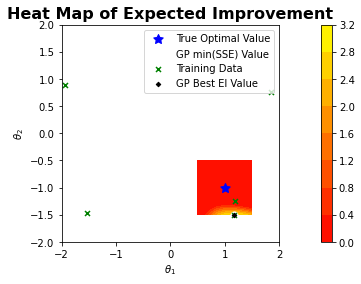

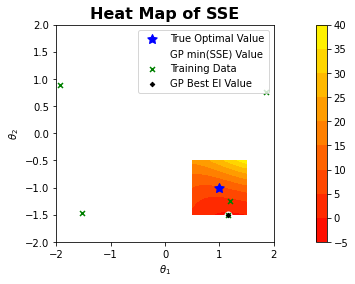

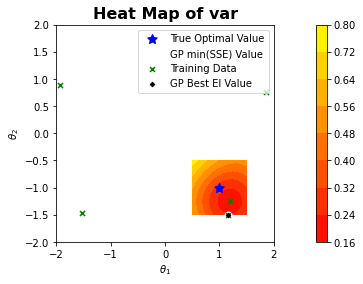

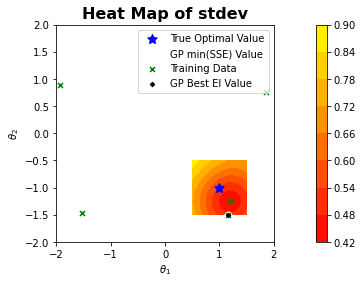

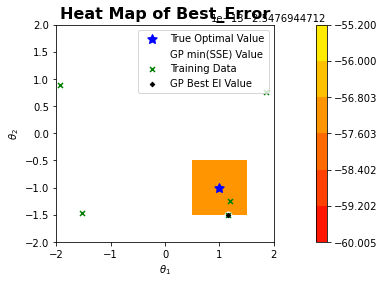

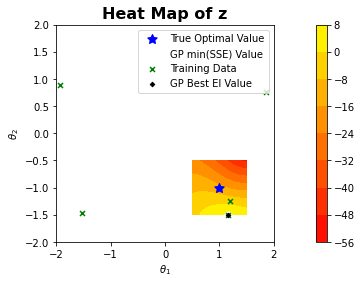

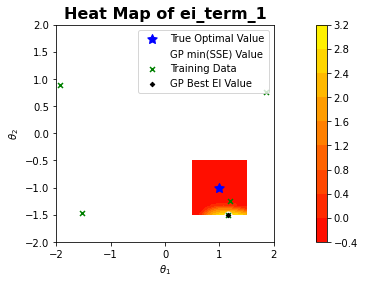

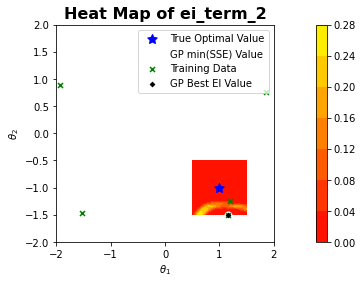

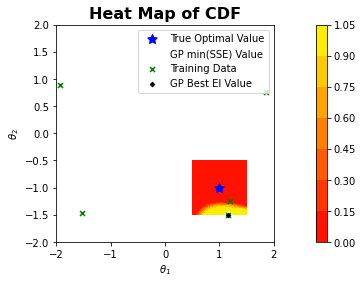

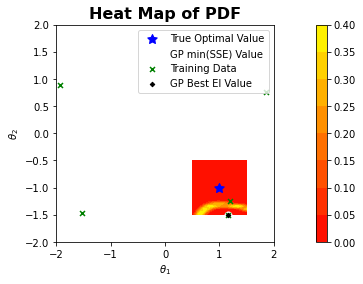

BO Iteration =  3
Exploration Bias =  0.5
Scipy Theta Best =  [ 1.1662464 -1.5      ]
Argmax Theta Best =  [ 1.18421053 -1.5       ]
Scipy Theta Opt =  [ 1.16624642 -1.5       ]
Argmin Theta_Opt_GP =  [ 1.18421053 -1.5       ] 



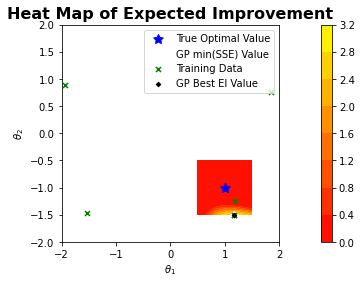

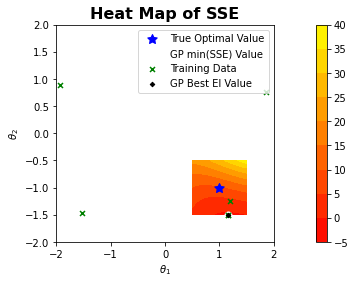

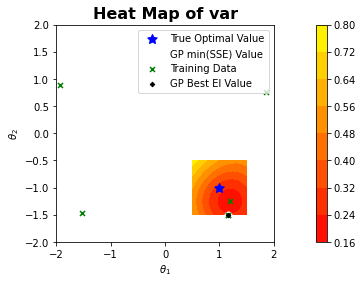

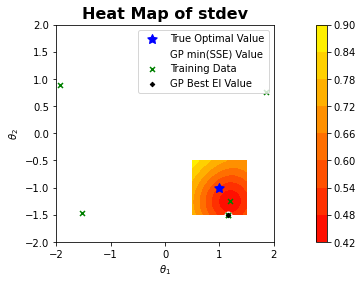

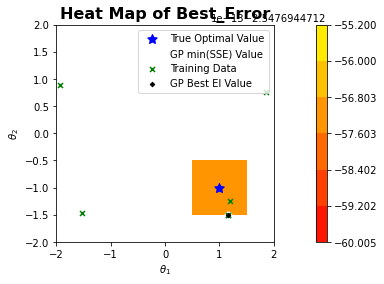

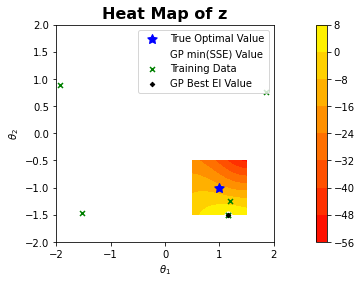

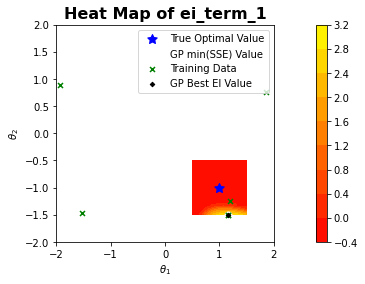

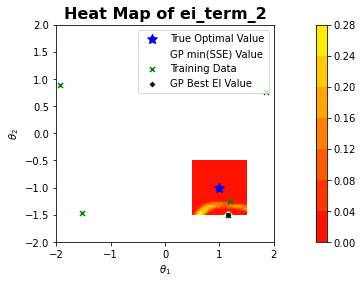

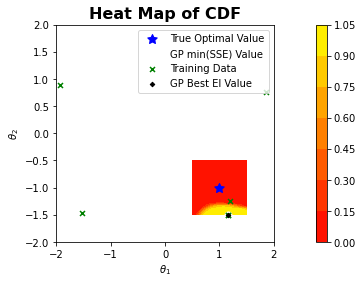

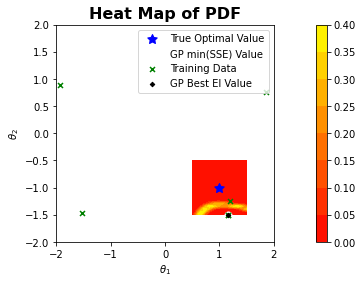

(array([ 1.1662464, -1.5      ]), array([ 1.16624642, -1.5       ]))


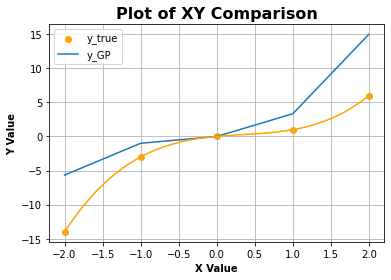

Magnitude of SSE given Theta_Opt =  [ 1.16624642 -1.5       ] is 160.339


In [4]:
##Objective function = SSE
##USING SCIPY METHOD
##Uses 4 LHS Training pointd

#Set 4 Point Training data, Model, and Likelihood
#Pull training data from CSV
train_data_doc = "train_2_in_data.csv"
train_data = np.array(pd.read_csv(train_data_doc, header=0,sep=","))
train_T = torch.tensor(train_data[:,1:3])
train_sse = torch.tensor(train_data[:,3])

t =len(train_T) #Desired number of training points
t = 4
obj = "obj"
train_T = train_T[0:t]
train_sse = train_sse[0:t]

likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = ExactGPModel(train_T, train_sse, likelihood)

for i in range(len(explore_bias)):
    BO_Results =  bo_iter(BO_iters, train_T, train_sse, p,q, theta_mesh, Theta_True, iterations, explore_bias[i], model, likelihood, Xexp, Yexp,obj, verbose)
    print(BO_Results)
    
    q_y = 3
    y_GP_input = np.zeros((n,3))
    for j in range(n):
        y_GP_input[j] = np.array([BO_Results[0][0],BO_Results[0][0],Xexp[j]])

    X_line = np.linspace(-2,2,100)
    y_true = calc_y_exp(Theta_True, X_line, noise_std, noise_mean=0)

    y_GP_Opt = create_y_data(q_y,y_GP_input)

    title = "XY Comparison"
    plot_xy(X_line,Xexp, Yexp, y_GP_Opt,y_true,title)

    Error_mag = np.sum((y_GP_Opt-Yexp)**2)
    print("Magnitude of SSE given Theta_Opt = ",BO_Results[1], "is", np.round(Error_mag,3))

BO Iteration =  1
Exploration Bias =  0
Scipy Theta Best =  [ 0.5 -1.5]
Argmax Theta Best =  [ 0.5 -1.5]
Scipy Theta Opt =  [ 0.5 -1.5]
Argmin Theta_Opt_GP =  [ 0.5 -1.5] 



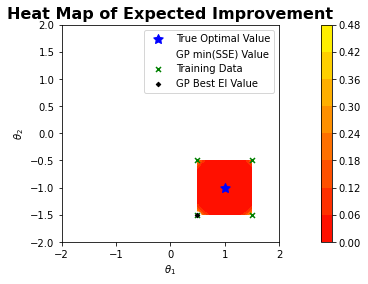

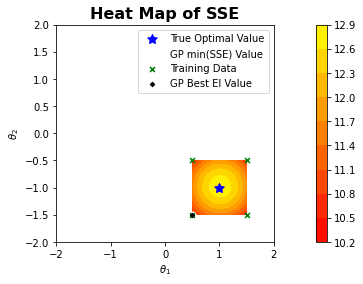

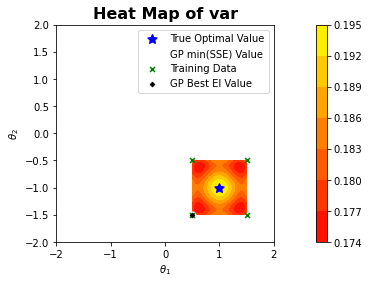

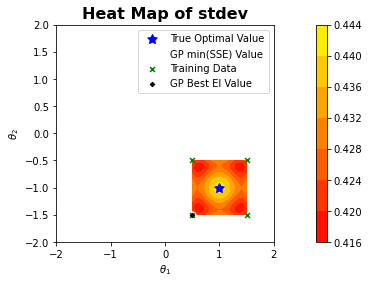

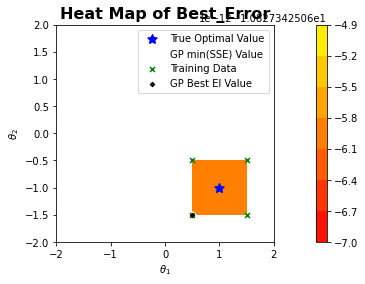

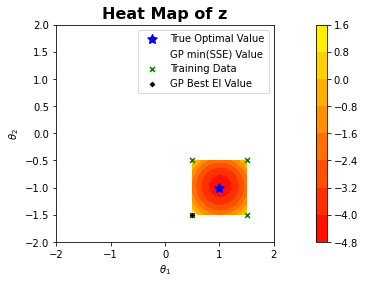

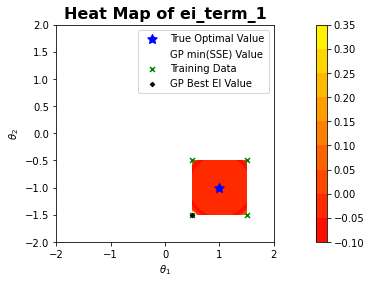

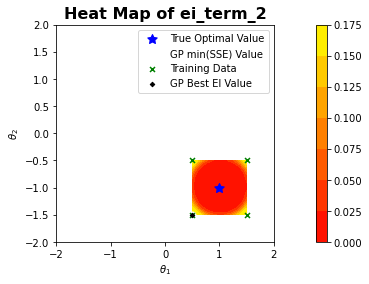

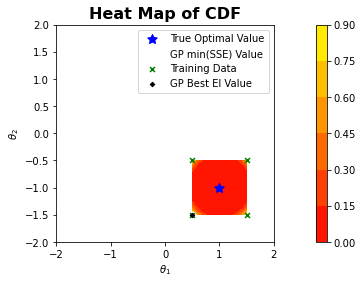

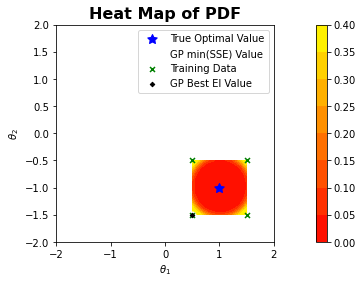

BO Iteration =  2
Exploration Bias =  0
Scipy Theta Best =  [ 0.5 -1.5]
Argmax Theta Best =  [ 0.5 -1.5]
Scipy Theta Opt =  [ 0.5 -1.5]
Argmin Theta_Opt_GP =  [ 0.5 -1.5] 



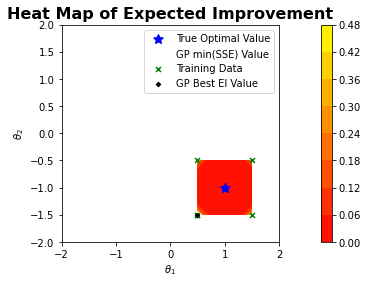

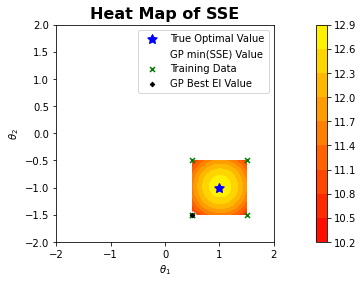

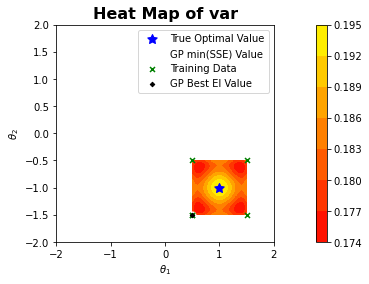

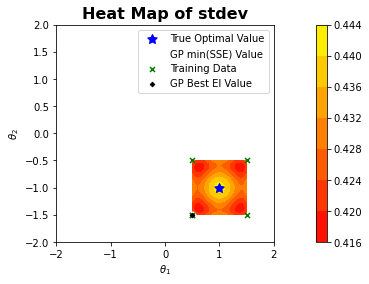

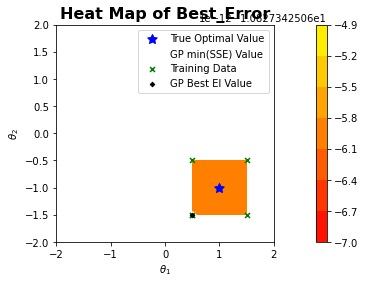

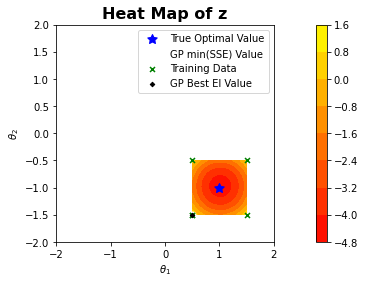

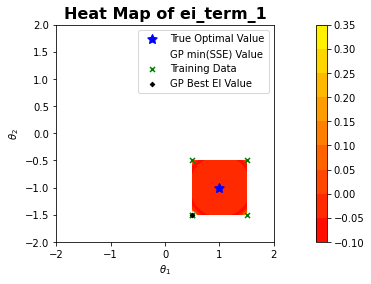

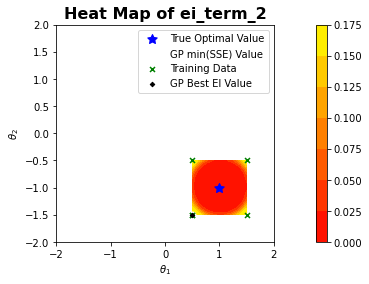

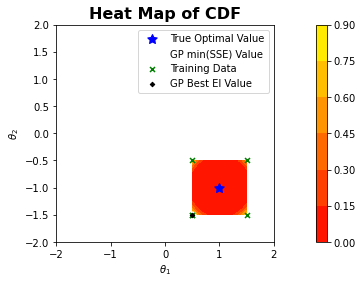

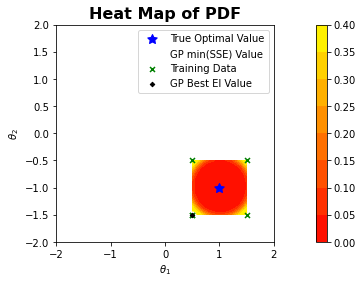

BO Iteration =  3
Exploration Bias =  0
Scipy Theta Best =  [ 0.5 -1.5]
Argmax Theta Best =  [ 0.5 -1.5]
Scipy Theta Opt =  [ 0.5 -1.5]
Argmin Theta_Opt_GP =  [ 0.5 -1.5] 



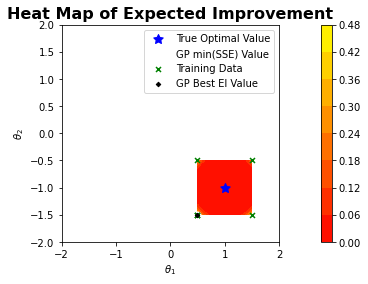

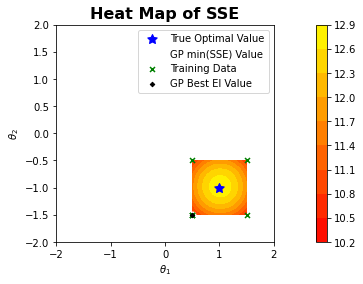

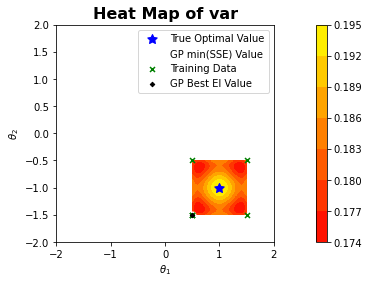

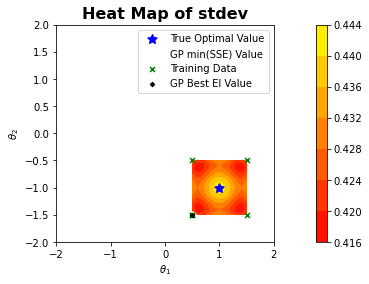

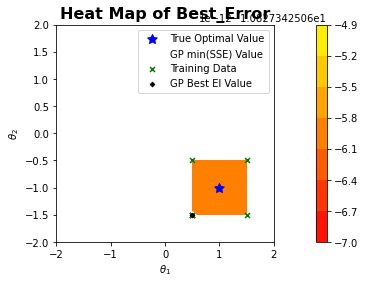

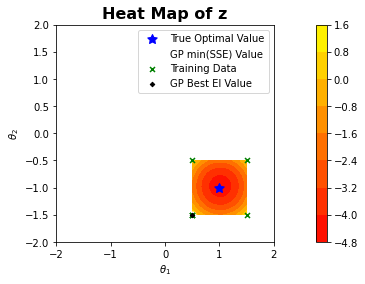

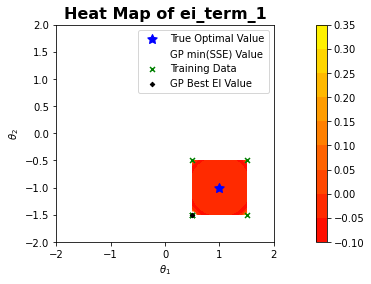

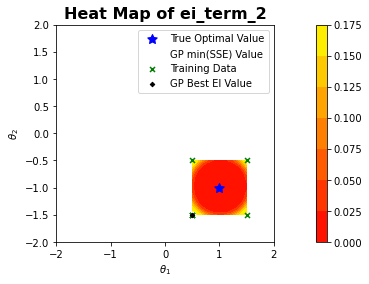

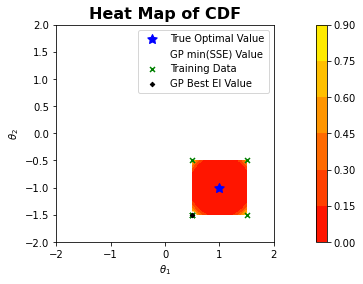

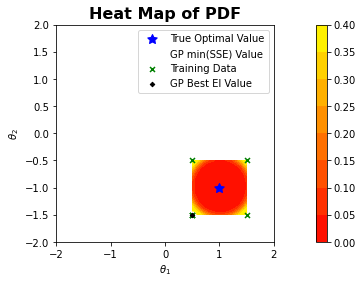

(array([ 0.5, -1.5]), array([ 0.5, -1.5]))


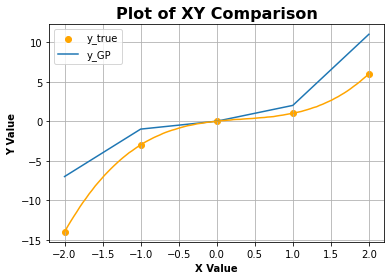

Magnitude of SSE given Theta_Opt =  [ 0.5 -1.5] is 79.282
BO Iteration =  1
Exploration Bias =  0.1
Scipy Theta Best =  [ 0.5 -1.5]
Argmax Theta Best =  [ 0.5 -1.5]
Scipy Theta Opt =  [ 0.5 -1.5]
Argmin Theta_Opt_GP =  [ 0.5 -1.5] 



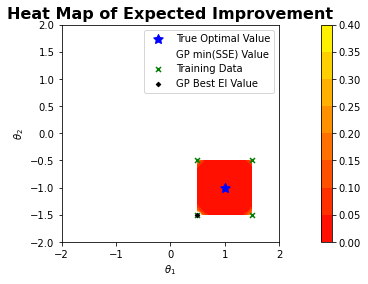

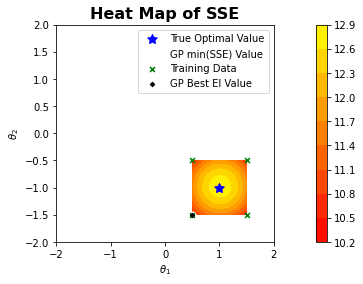

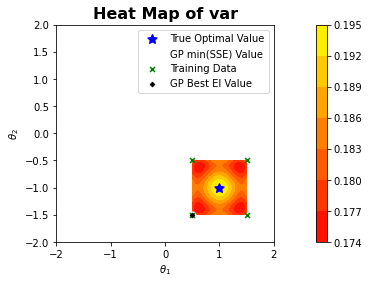

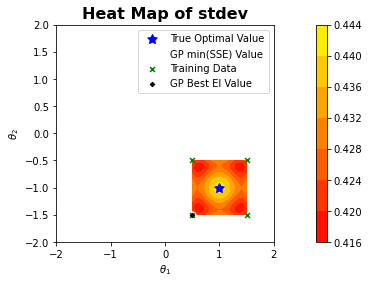

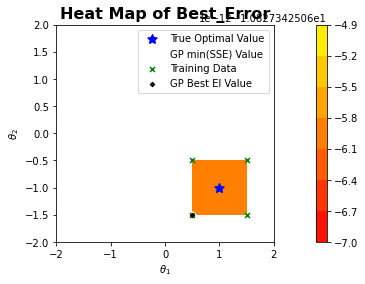

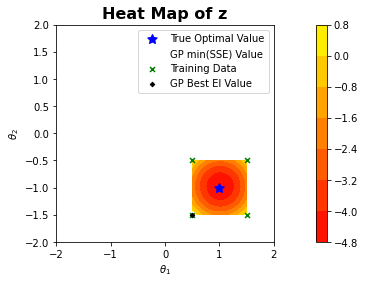

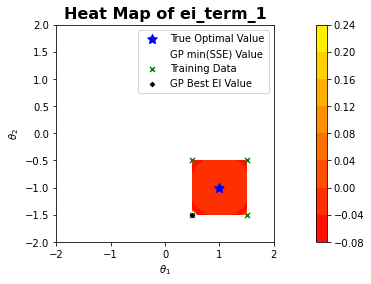

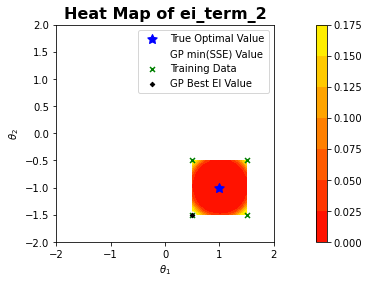

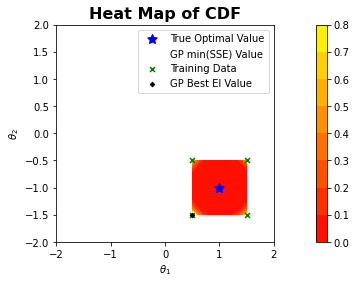

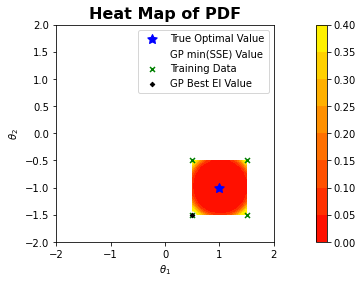

BO Iteration =  2
Exploration Bias =  0.1
Scipy Theta Best =  [ 0.5 -1.5]
Argmax Theta Best =  [ 0.5 -1.5]
Scipy Theta Opt =  [ 0.5 -1.5]
Argmin Theta_Opt_GP =  [ 0.5 -1.5] 



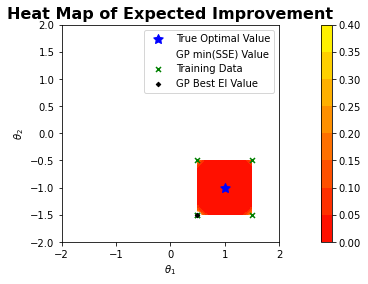

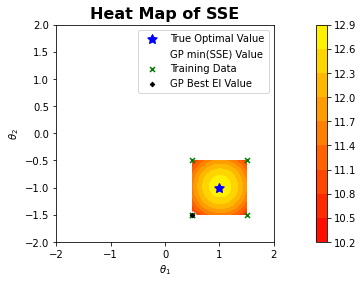

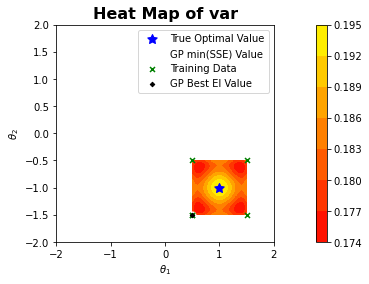

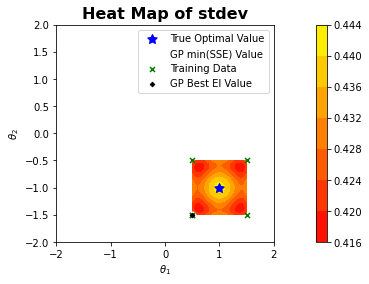

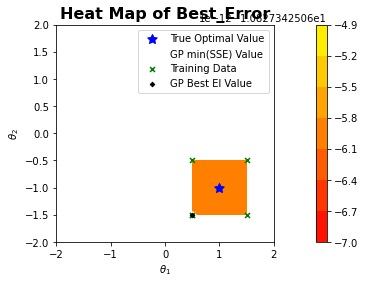

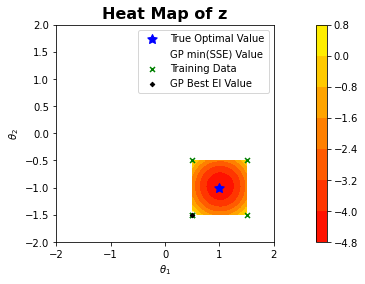

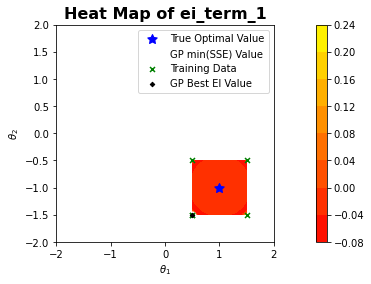

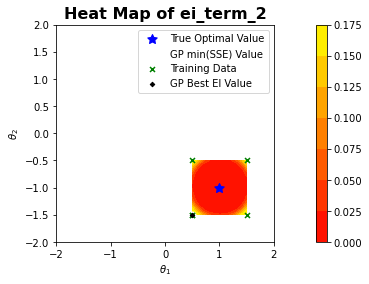

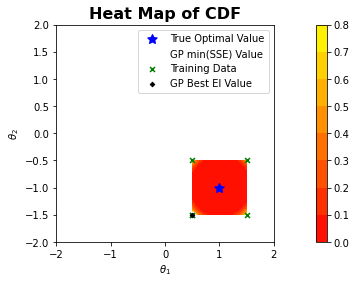

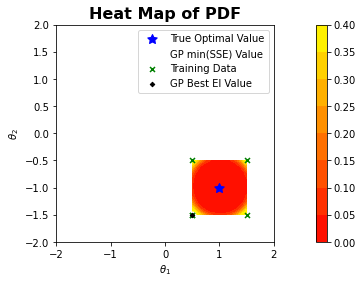

BO Iteration =  3
Exploration Bias =  0.1
Scipy Theta Best =  [ 0.5 -1.5]
Argmax Theta Best =  [ 0.5 -1.5]
Scipy Theta Opt =  [ 0.5 -1.5]
Argmin Theta_Opt_GP =  [ 0.5 -1.5] 



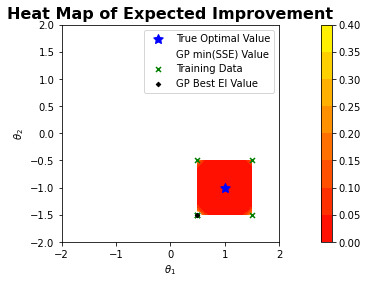

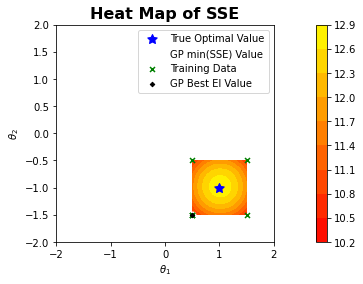

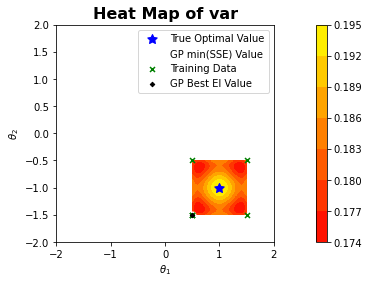

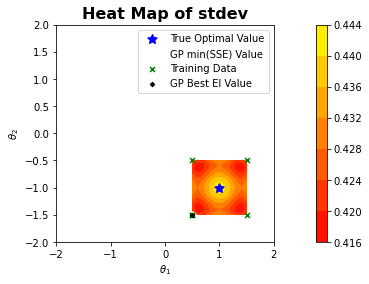

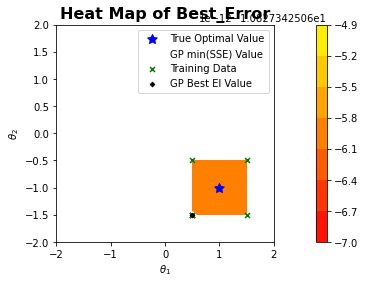

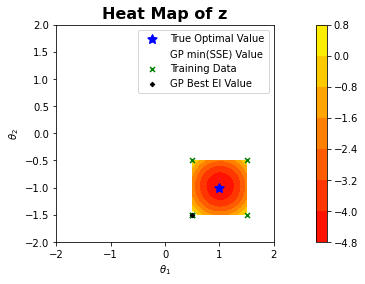

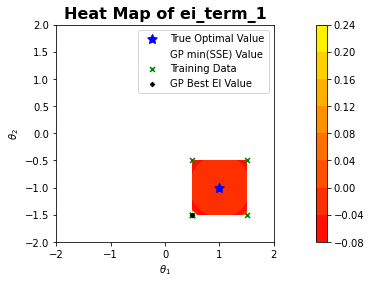

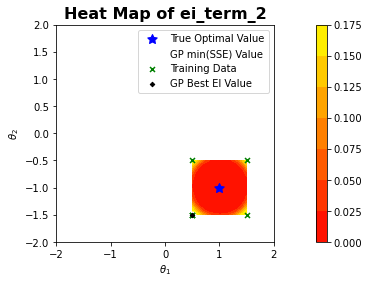

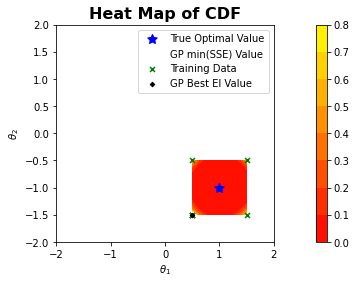

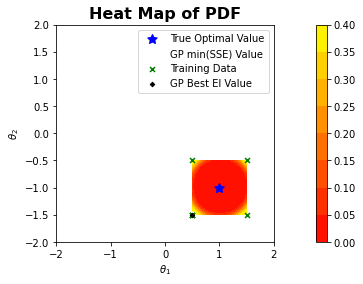

(array([ 0.5, -1.5]), array([ 0.5, -1.5]))


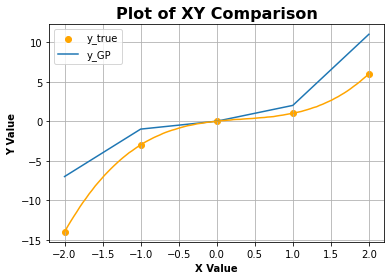

Magnitude of SSE given Theta_Opt =  [ 0.5 -1.5] is 79.282
BO Iteration =  1
Exploration Bias =  0.5
Scipy Theta Best =  [ 0.5 -1.5]
Argmax Theta Best =  [ 0.5 -1.5]
Scipy Theta Opt =  [ 0.5 -1.5]
Argmin Theta_Opt_GP =  [ 0.5 -1.5] 



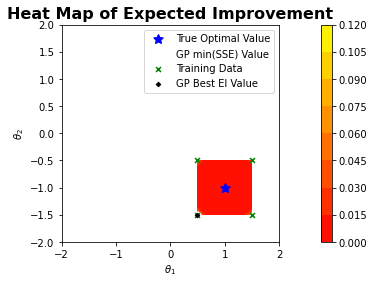

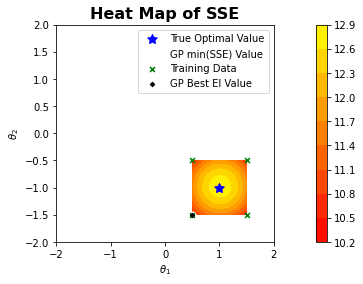

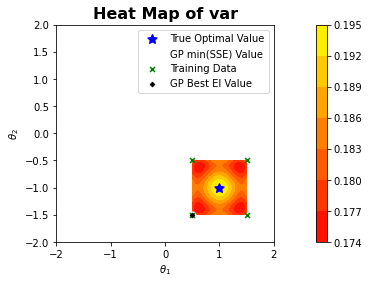

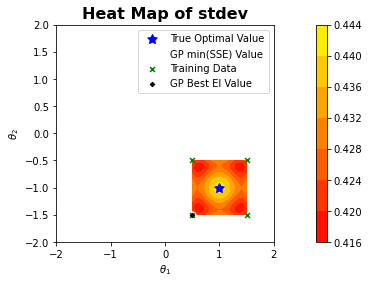

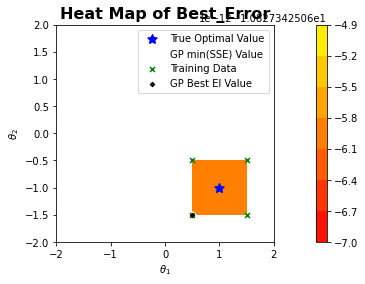

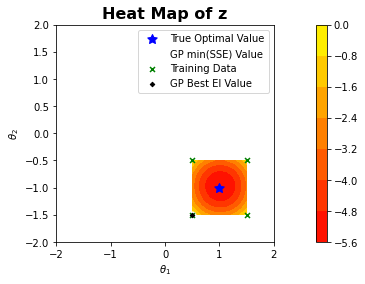

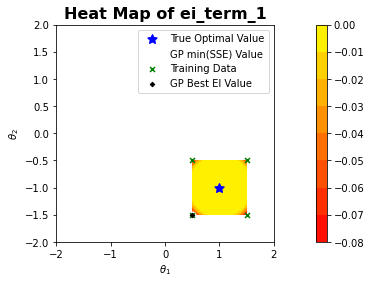

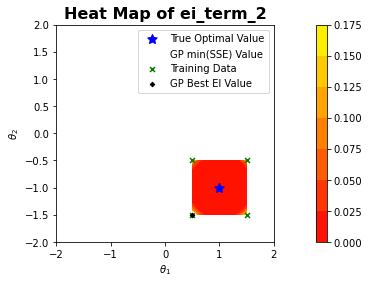

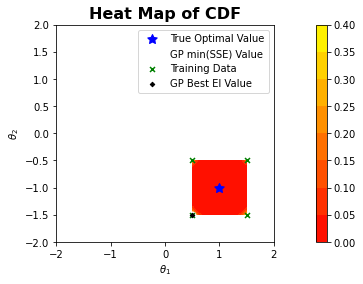

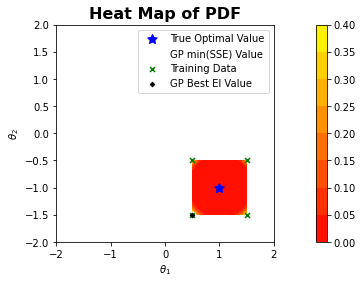

BO Iteration =  2
Exploration Bias =  0.5
Scipy Theta Best =  [ 0.5 -1.5]
Argmax Theta Best =  [ 0.5 -1.5]
Scipy Theta Opt =  [ 0.5 -1.5]
Argmin Theta_Opt_GP =  [ 0.5 -1.5] 



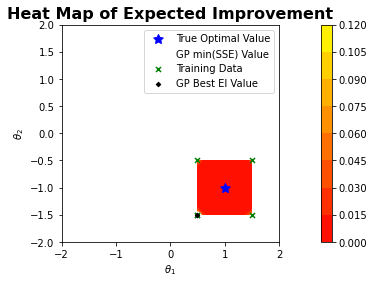

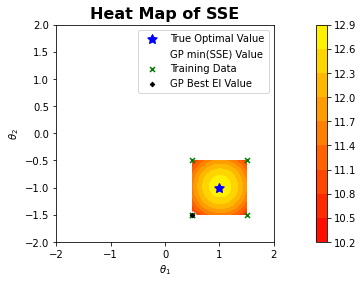

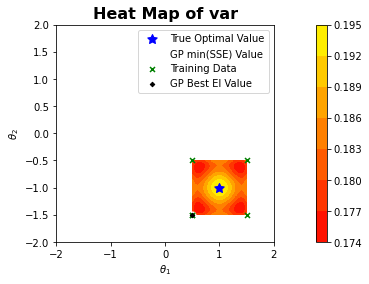

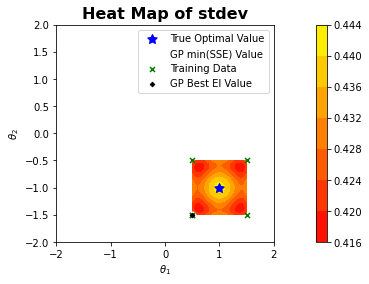

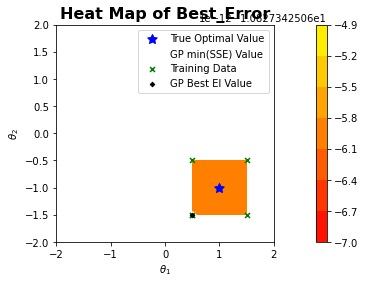

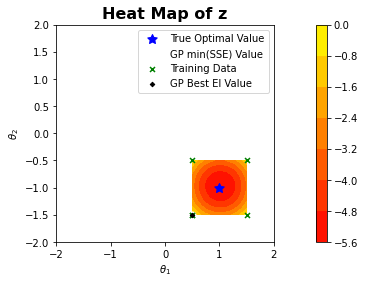

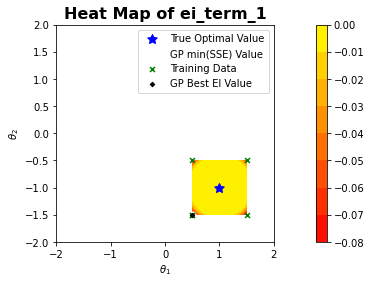

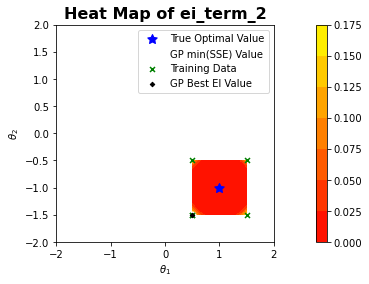

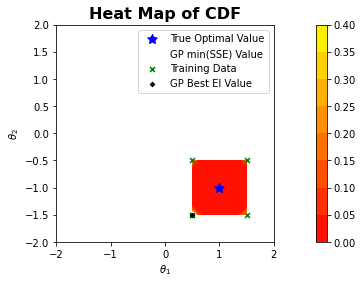

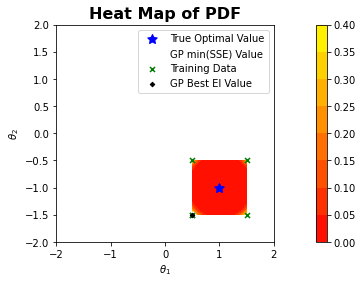

BO Iteration =  3
Exploration Bias =  0.5
Scipy Theta Best =  [ 0.5 -1.5]
Argmax Theta Best =  [ 0.5 -1.5]
Scipy Theta Opt =  [ 0.5 -1.5]
Argmin Theta_Opt_GP =  [ 0.5 -1.5] 



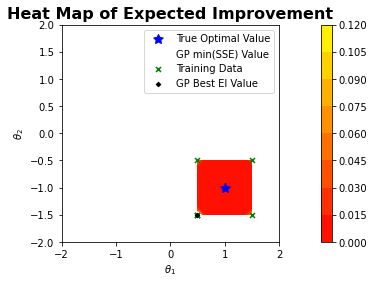

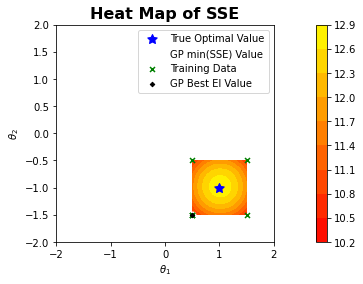

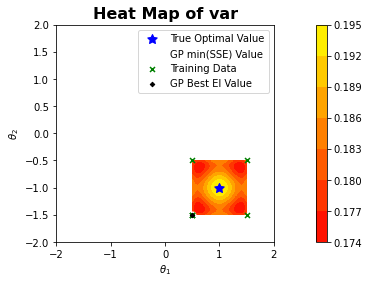

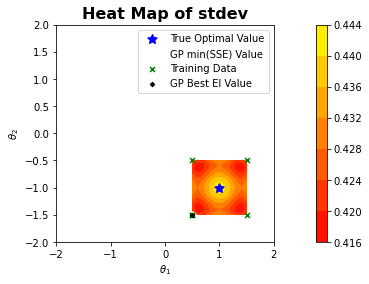

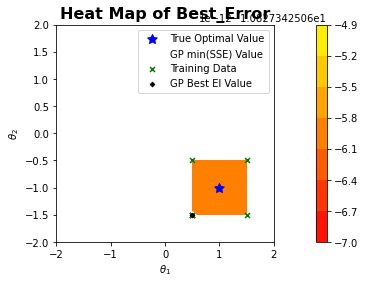

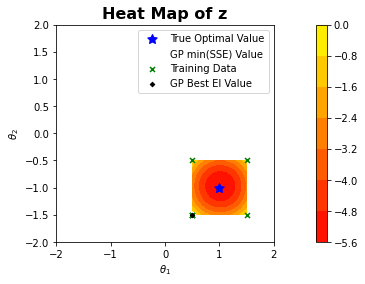

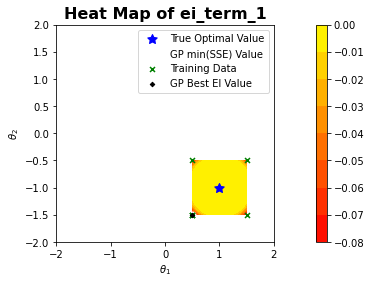

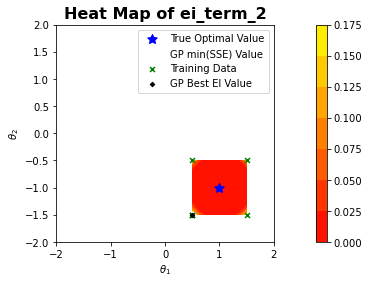

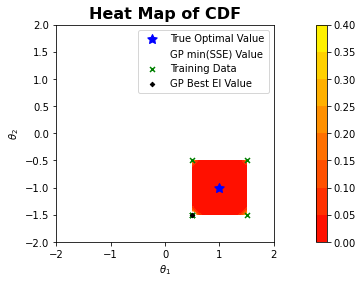

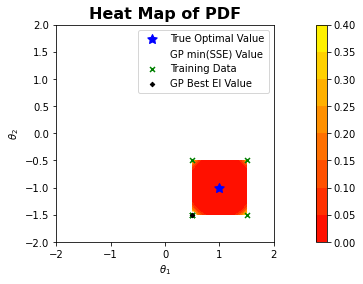

(array([ 0.5, -1.5]), array([ 0.5, -1.5]))


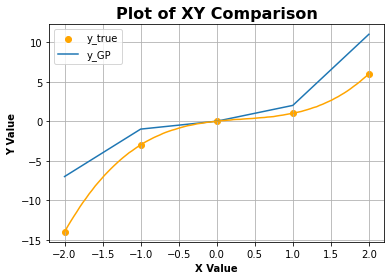

Magnitude of SSE given Theta_Opt =  [ 0.5 -1.5] is 79.282


In [5]:
##Objective function = SSE
##USING SCIPY METHOD

#Set 4 Point Training data, Model, and Likelihood
from bo_functions import create_sse_data
obj = "obj"
T1_min = np.min(Theta1)
T1_max = np.max(Theta1)
T2_min = np.min(Theta2)
T2_max = np.max(Theta2)
train_T = torch.tensor([[T1_min,T2_min],[T1_min,T2_max],[T1_max,T2_min],[T1_max,T2_max]])
train_sse = create_sse_data(q,train_T,Xexp,Yexp, obj)

likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = ExactGPModel(train_T, train_sse, likelihood)

for i in range(len(explore_bias)):
    BO_Results =  bo_iter(BO_iters, train_T, train_sse, p,q, theta_mesh, Theta_True, iterations, explore_bias[i], model, likelihood, Xexp, Yexp,obj, verbose)
    print(BO_Results)
    
    q_y = 3
    y_GP_input = np.zeros((n,3))
    for j in range(n):
        y_GP_input[j] = np.array([BO_Results[0][0],BO_Results[0][0],Xexp[j]])

    X_line = np.linspace(-2,2,100)
    y_true = calc_y_exp(Theta_True, X_line, noise_std, noise_mean=0)

    y_GP_Opt = create_y_data(q_y,y_GP_input)

    title = "XY Comparison"
    plot_xy(X_line,Xexp, Yexp, y_GP_Opt,y_true,title)

    Error_mag = np.sum((y_GP_Opt-Yexp)**2)
    print("Magnitude of SSE given Theta_Opt = ",BO_Results[1], "is", np.round(Error_mag,3))

BO Iteration =  1
Exploration Bias =  0
Scipy Theta Best =  [ 0.5 -1.5]
Argmax Theta Best =  [ 0.5 -1.5]
Scipy Theta Opt =  [ 0.5 -1.5]
Argmin Theta_Opt_GP =  [ 0.5 -1.5] 



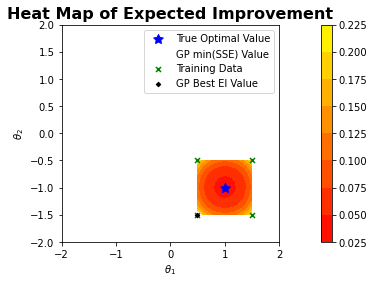

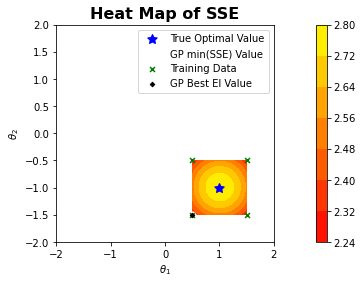

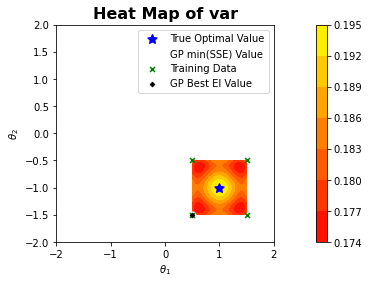

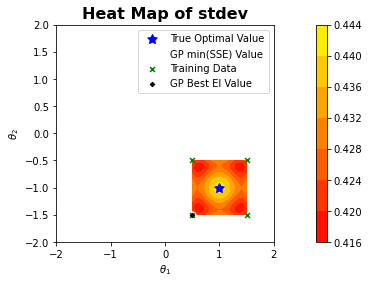

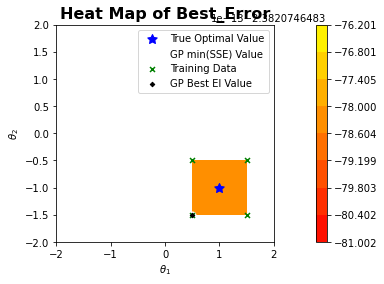

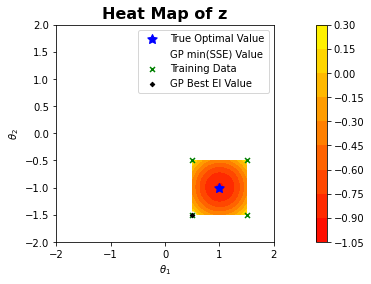

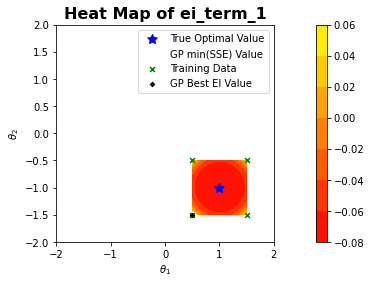

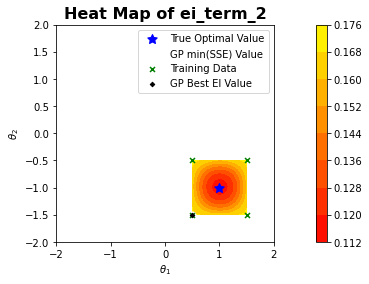

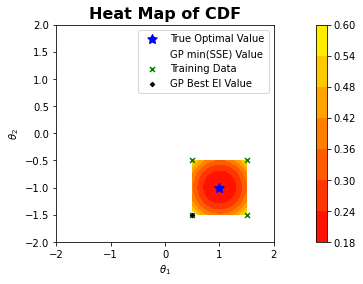

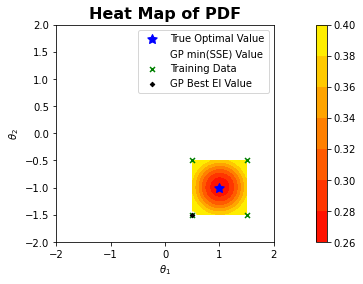

BO Iteration =  2
Exploration Bias =  0
Scipy Theta Best =  [ 0.5 -1.5]
Argmax Theta Best =  [ 0.5 -1.5]
Scipy Theta Opt =  [ 0.5 -1.5]
Argmin Theta_Opt_GP =  [ 0.5 -1.5] 



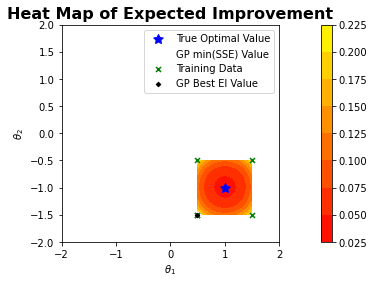

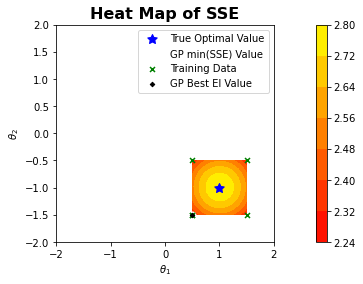

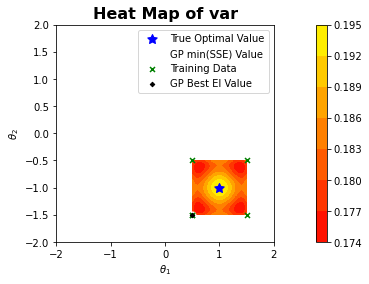

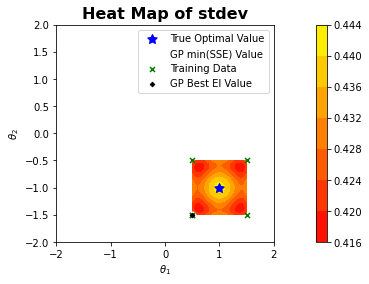

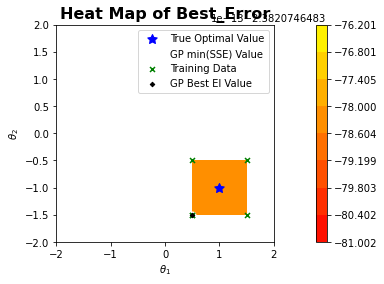

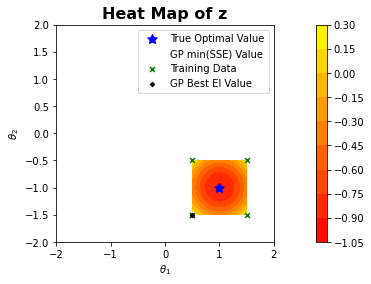

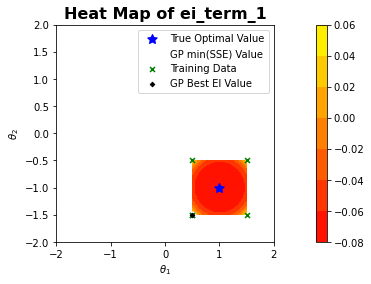

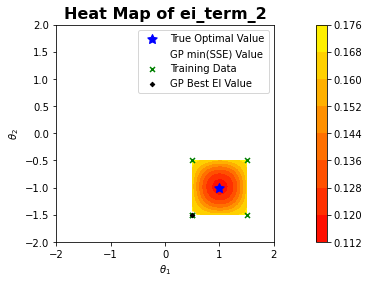

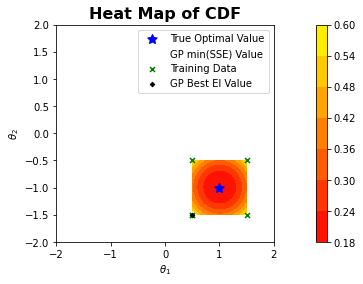

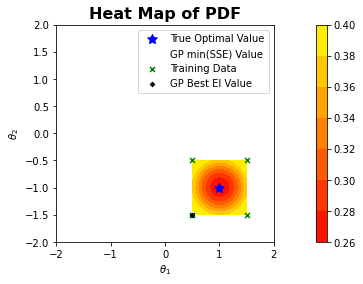

BO Iteration =  3
Exploration Bias =  0
Scipy Theta Best =  [ 0.5 -1.5]
Argmax Theta Best =  [ 0.5 -1.5]
Scipy Theta Opt =  [ 0.5 -1.5]
Argmin Theta_Opt_GP =  [ 0.5 -1.5] 



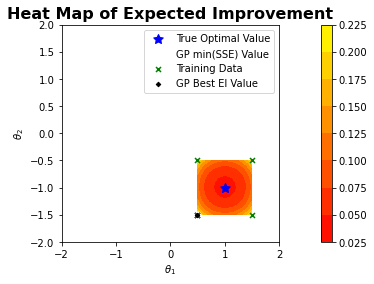

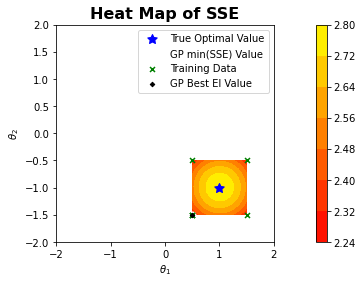

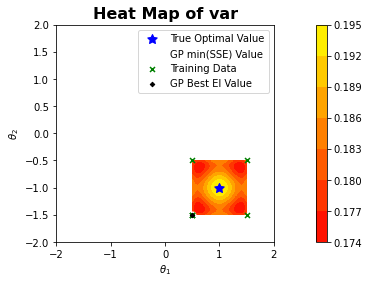

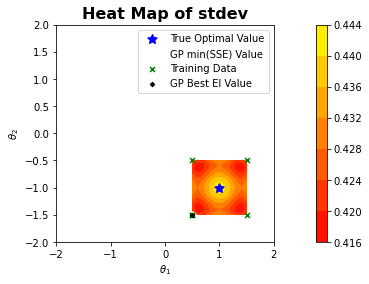

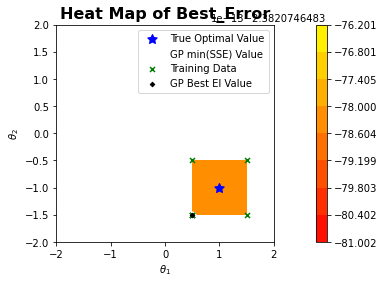

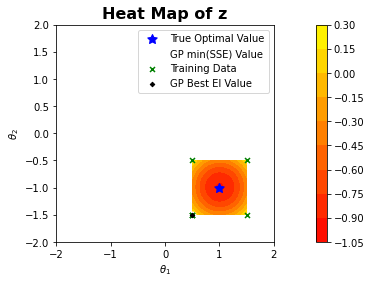

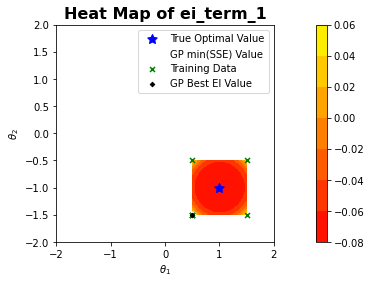

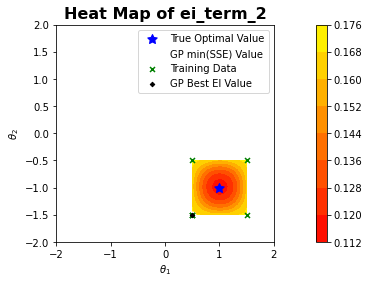

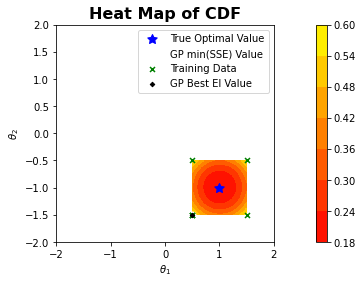

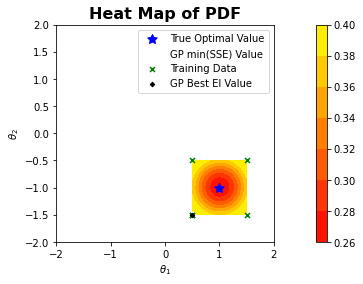

(array([ 0.5, -1.5]), array([ 0.5, -1.5]))


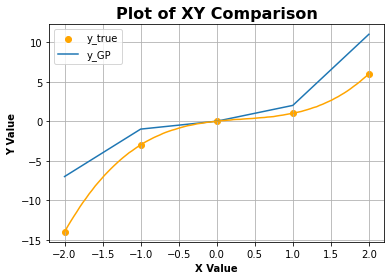

Magnitude of SSE given Theta_Opt =  [ 0.5 -1.5] is 79.282
BO Iteration =  1
Exploration Bias =  0.1
Scipy Theta Best =  [ 0.5 -1.5]
Argmax Theta Best =  [ 0.5 -1.5]
Scipy Theta Opt =  [ 0.5 -1.5]
Argmin Theta_Opt_GP =  [ 0.5 -1.5] 



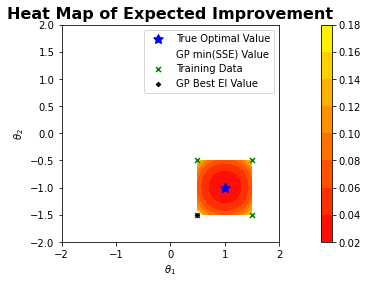

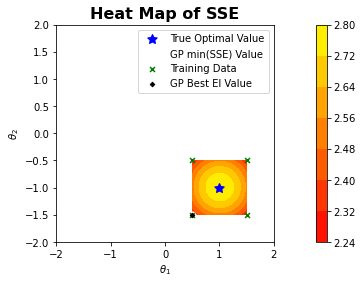

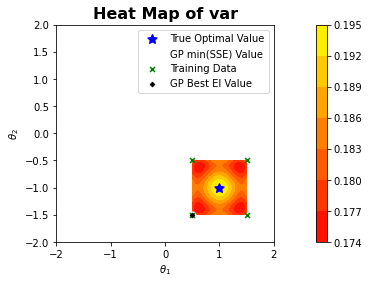

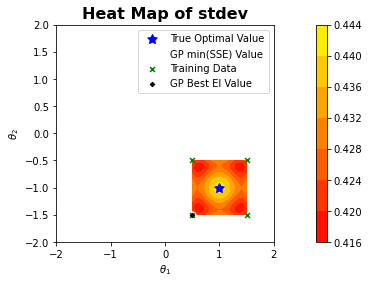

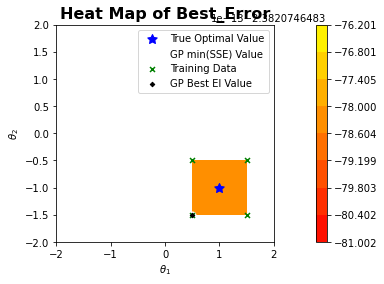

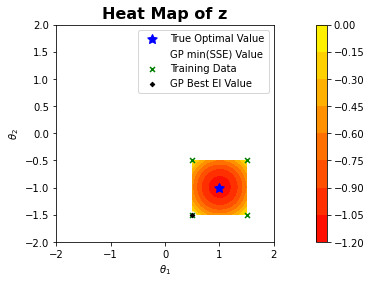

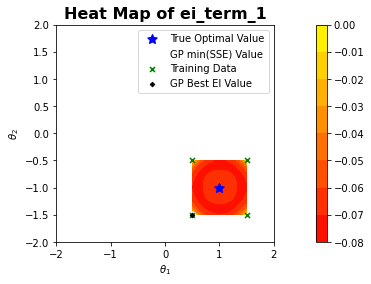

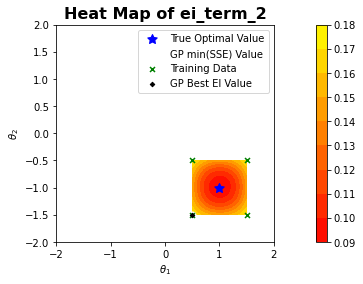

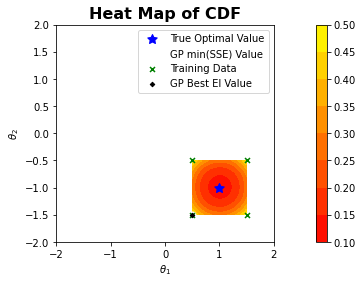

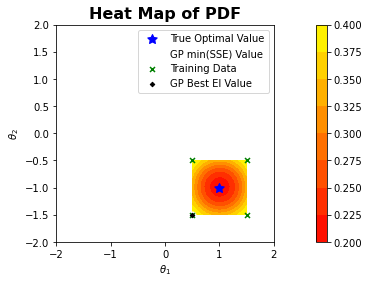

BO Iteration =  2
Exploration Bias =  0.1
Scipy Theta Best =  [ 0.5 -1.5]
Argmax Theta Best =  [ 0.5 -1.5]
Scipy Theta Opt =  [ 0.5 -1.5]
Argmin Theta_Opt_GP =  [ 0.5 -1.5] 



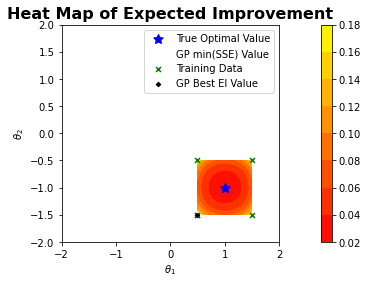

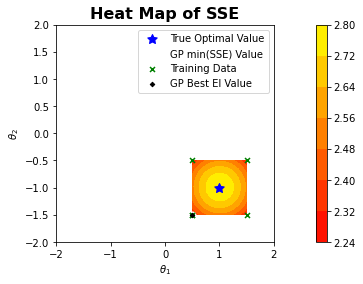

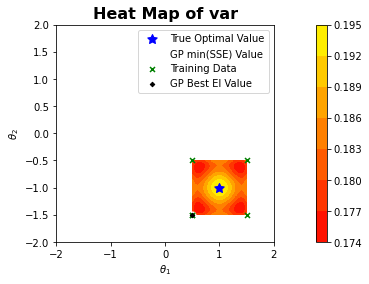

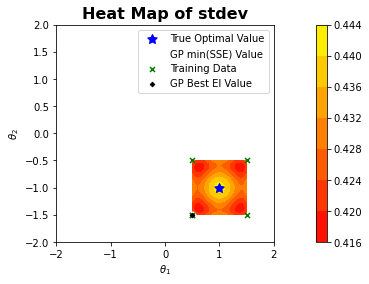

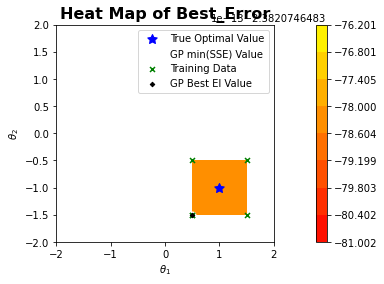

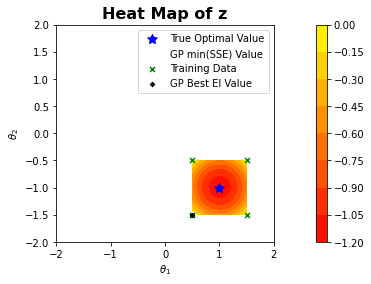

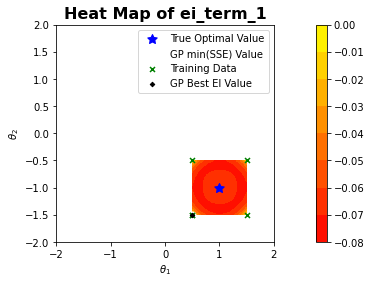

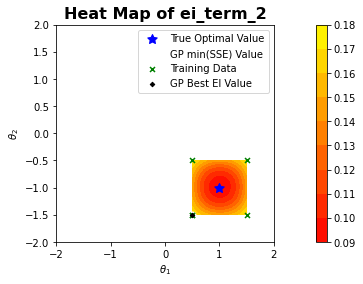

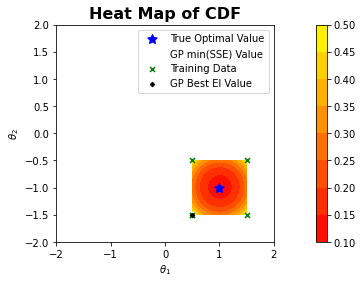

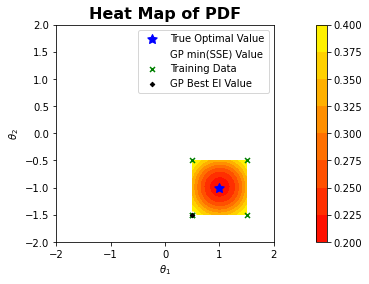

BO Iteration =  3
Exploration Bias =  0.1
Scipy Theta Best =  [ 0.5 -1.5]
Argmax Theta Best =  [ 0.5 -1.5]
Scipy Theta Opt =  [ 0.5 -1.5]
Argmin Theta_Opt_GP =  [ 0.5 -1.5] 



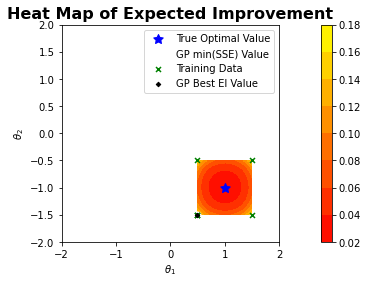

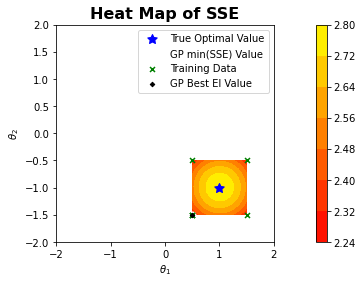

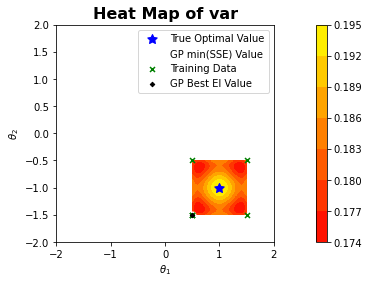

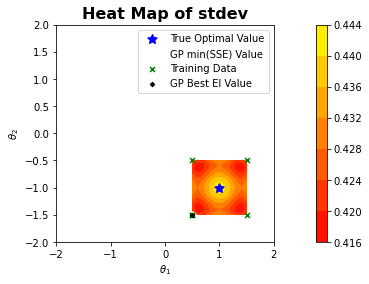

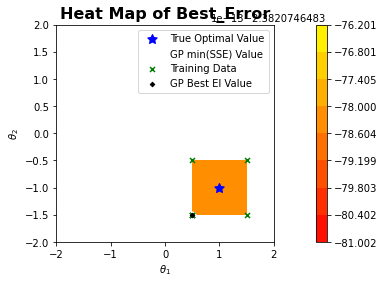

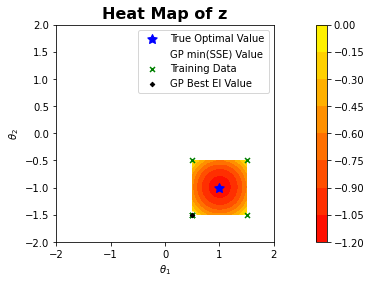

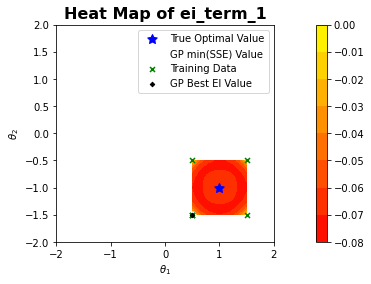

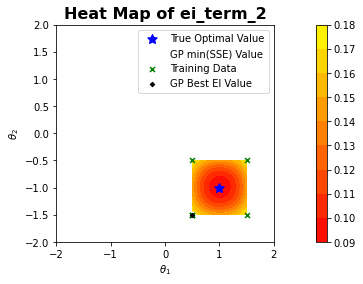

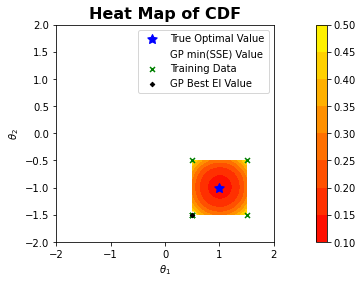

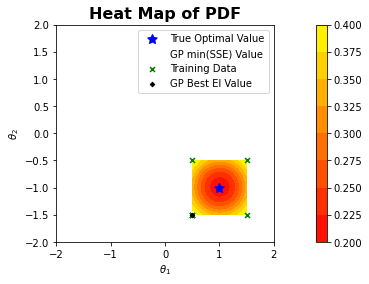

(array([ 0.5, -1.5]), array([ 0.5, -1.5]))


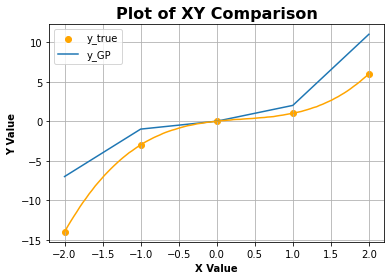

Magnitude of SSE given Theta_Opt =  [ 0.5 -1.5] is 79.282
BO Iteration =  1
Exploration Bias =  0.5
Scipy Theta Best =  [ 0.5 -1.5]
Argmax Theta Best =  [ 0.5 -1.5]
Scipy Theta Opt =  [ 0.5 -1.5]
Argmin Theta_Opt_GP =  [ 0.5 -1.5] 



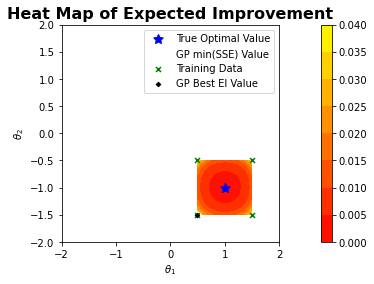

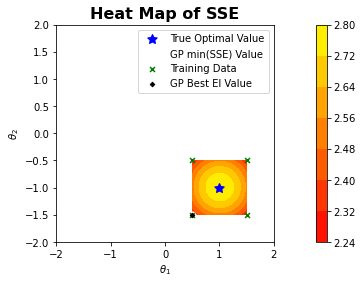

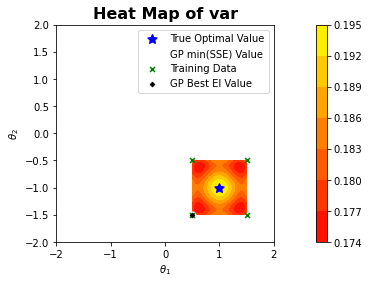

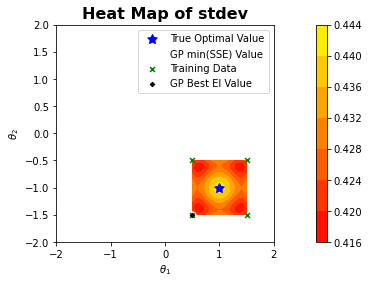

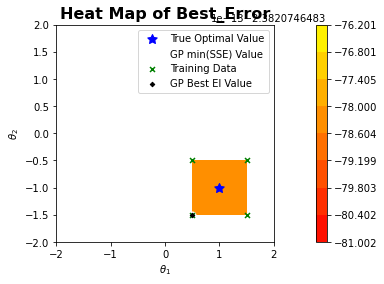

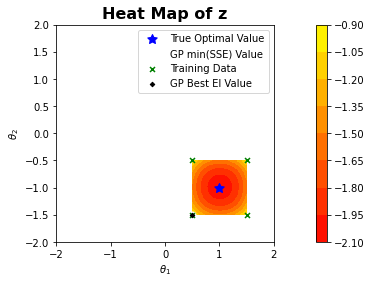

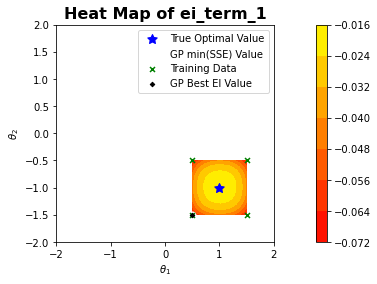

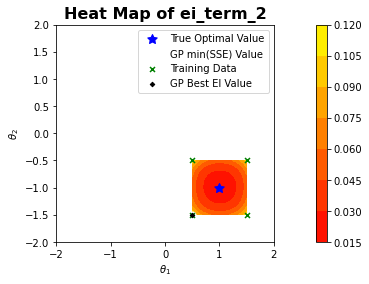

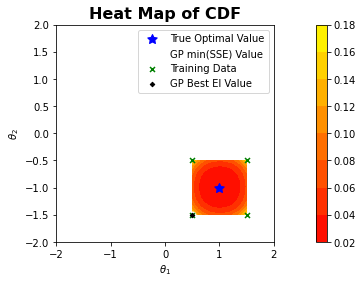

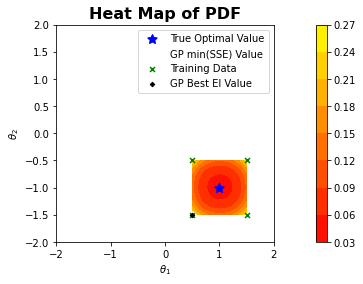

BO Iteration =  2
Exploration Bias =  0.5
Scipy Theta Best =  [ 0.5 -1.5]
Argmax Theta Best =  [ 0.5 -1.5]
Scipy Theta Opt =  [ 0.5 -1.5]
Argmin Theta_Opt_GP =  [ 0.5 -1.5] 



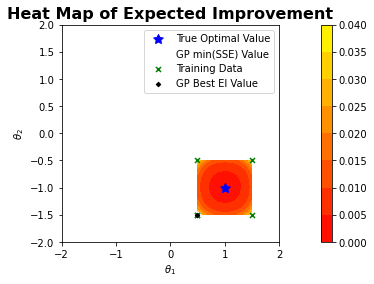

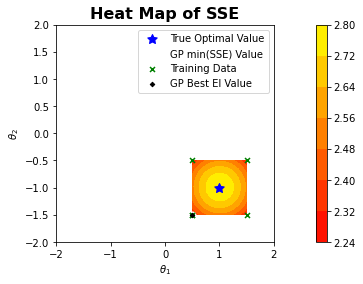

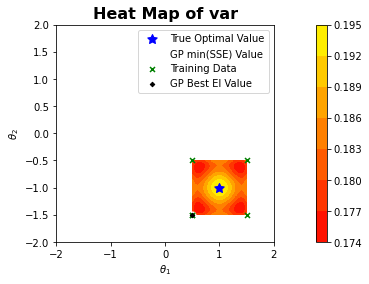

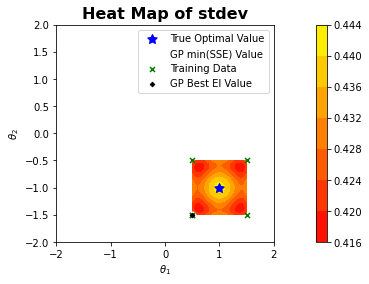

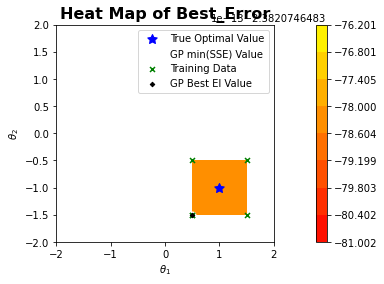

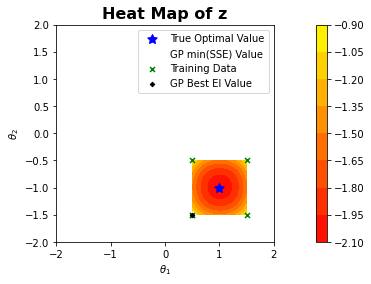

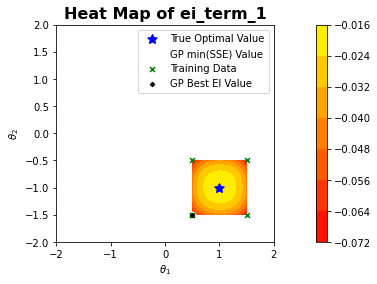

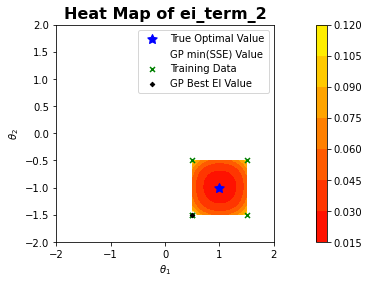

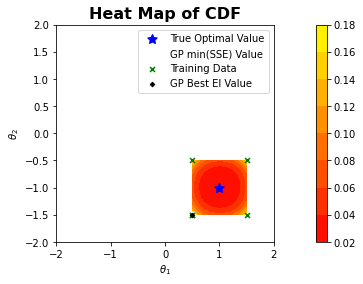

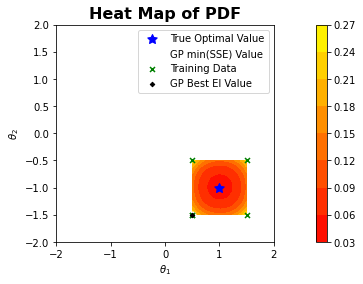

BO Iteration =  3
Exploration Bias =  0.5
Scipy Theta Best =  [ 0.5 -1.5]
Argmax Theta Best =  [ 0.5 -1.5]
Scipy Theta Opt =  [ 0.5 -1.5]
Argmin Theta_Opt_GP =  [ 0.5 -1.5] 



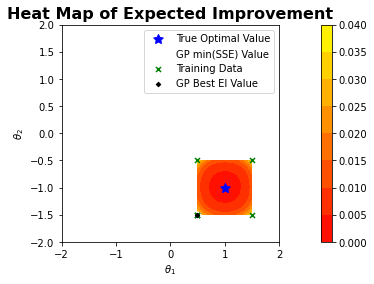

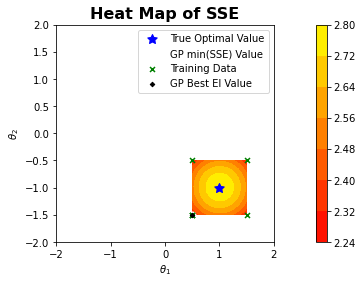

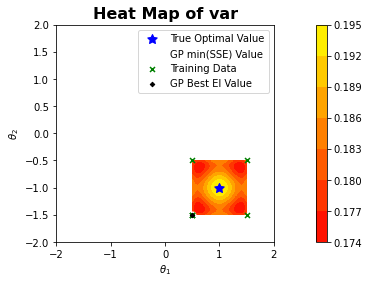

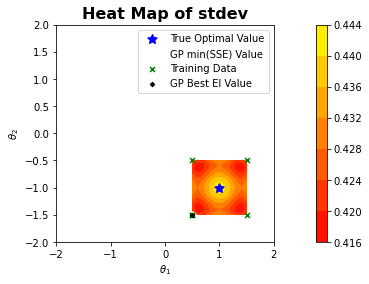

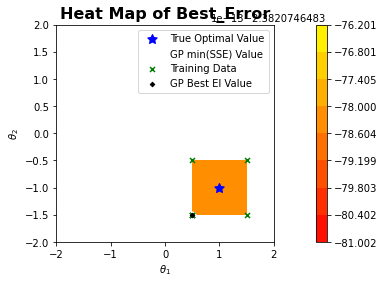

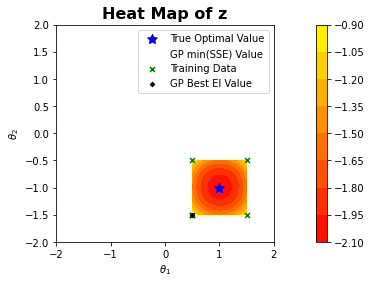

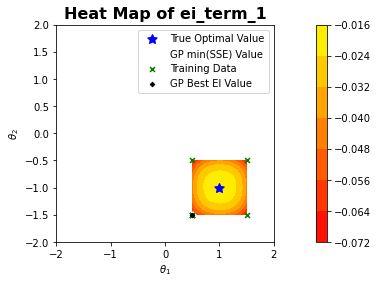

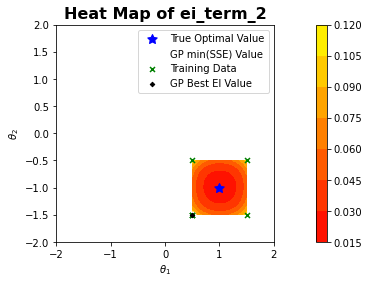

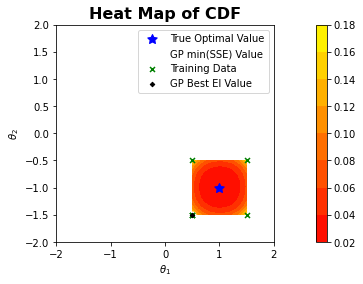

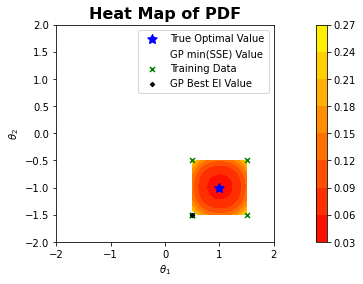

(array([ 0.5, -1.5]), array([ 0.5, -1.5]))


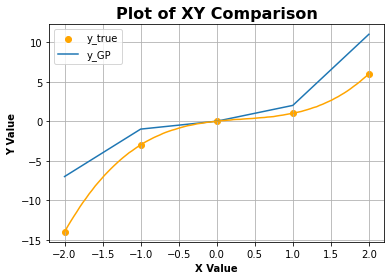

Magnitude of SSE given Theta_Opt =  [ 0.5 -1.5] is 79.282


In [6]:
##Objective function = ln(SSE)
##USING SCIPY METHOD

#Set 4 Point Training data, Model, and Likelihood
from bo_functions import create_sse_data
obj = "LN_obj"
T1_min = np.min(Theta1)
T1_max = np.max(Theta1)
T2_min = np.min(Theta2)
T2_max = np.max(Theta2)
train_T = torch.tensor([[T1_min,T2_min],[T1_min,T2_max],[T1_max,T2_min],[T1_max,T2_max]])
train_sse = create_sse_data(q,train_T,Xexp,Yexp, obj)

likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = ExactGPModel(train_T, train_sse, likelihood)

for i in range(len(explore_bias)):
    BO_Results =  bo_iter(BO_iters, train_T, train_sse, p,q, theta_mesh, Theta_True, iterations, explore_bias[i], model, likelihood, Xexp, Yexp,obj, verbose)
    print(BO_Results)
    
    q_y = 3
    y_GP_input = np.zeros((n,3))
    for j in range(n):
        y_GP_input[j] = np.array([BO_Results[0][0],BO_Results[0][0],Xexp[j]])

    X_line = np.linspace(-2,2,100)
    y_true = calc_y_exp(Theta_True, X_line, noise_std, noise_mean=0)

    y_GP_Opt = create_y_data(q_y,y_GP_input)

    title = "XY Comparison"
    plot_xy(X_line,Xexp, Yexp, y_GP_Opt,y_true,title)

    Error_mag = np.sum((y_GP_Opt-Yexp)**2)
    print("Magnitude of SSE given Theta_Opt = ",BO_Results[1], "is", np.round(Error_mag,3))